# Red Wine Quality Prediction Is a Classification Model

In [1]:
print(('*'*127))
print("                                                      Red Wine                                                                 ")
print(('*'*127))

*******************************************************************************************************************************
                                                      Red Wine                                                                 
*******************************************************************************************************************************


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

from matplotlib import pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")


pd.set_option('display.max_rows', 1600)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width',100)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
33              6.9             0.605         0.12           10.70      0.073   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
38              5.7             1.130         0.09            1.50      0.172   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
42              7.5             0.490         0.20            2.60      0.332   
43              8.1             0.660         0.22            2.20      0.069   
44              6.8             0.670         0.02            1.80      0.050   
45              4.6             0.520         0.15            2.10      0.054   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400

In [3]:
print("We have 1599 rows and 12 columns")
df.shape

We have 1599 rows and 12 columns


(1599, 12)

In [4]:
print ("We have majority Float-type for all variables and Quality is our target variable which is of int-type")
df.dtypes

We have majority Float-type for all variables and Quality is our target variable which is of int-type


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
print("There are No Missing values, all values in the dataset are intact")
df.isnull().sum()

There are No Missing values, all values in the dataset are intact


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

# Dataset Descirption

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine

Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones).

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

## Attributes

Input variables (based on physicochemical tests):

* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol


# EDA

# Displot

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

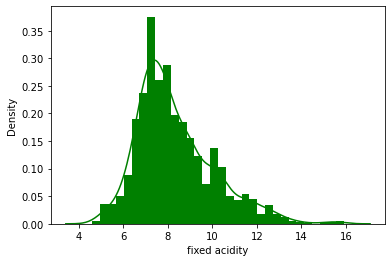

In [7]:
sn.distplot(df["fixed acidity"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

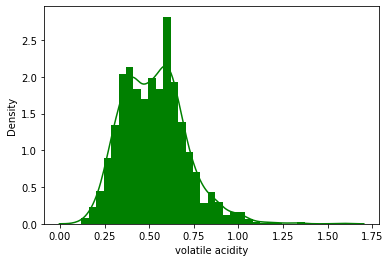

In [8]:
sn.distplot(df["volatile acidity"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

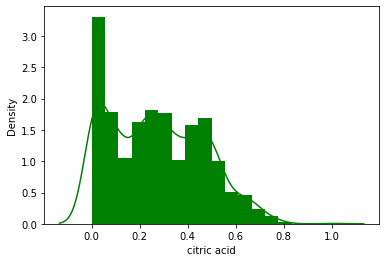

In [9]:
sn.distplot(df["citric acid"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

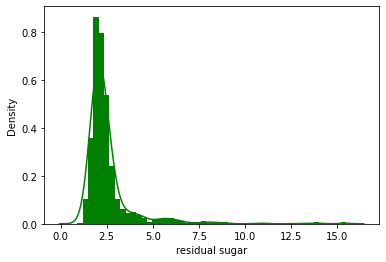

In [10]:
sn.distplot(df["residual sugar"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

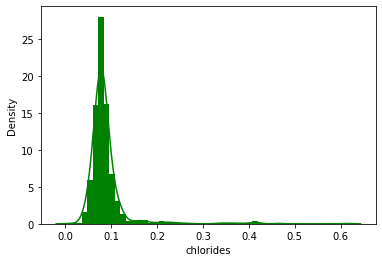

In [11]:
sn.distplot(df["chlorides"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

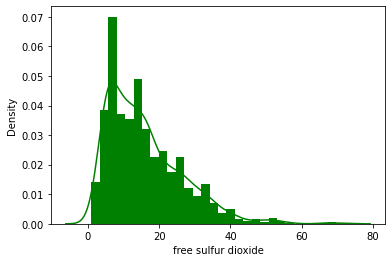

In [12]:
sn.distplot(df["free sulfur dioxide"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

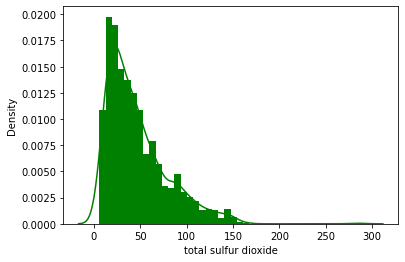

In [13]:
sn.distplot(df["total sulfur dioxide"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='density', ylabel='Density'>

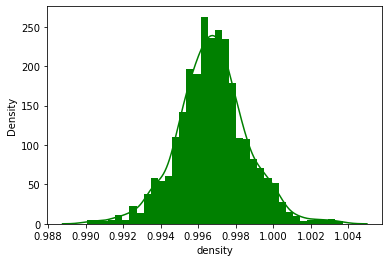

In [14]:
sn.distplot(df["density"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='pH', ylabel='Density'>

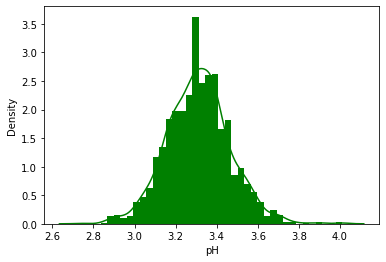

In [15]:
sn.distplot(df["pH"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

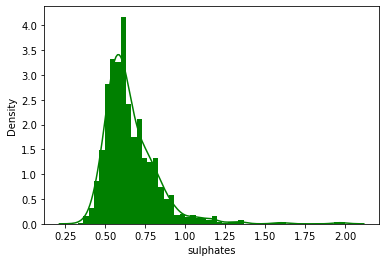

In [16]:
sn.distplot(df["sulphates"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

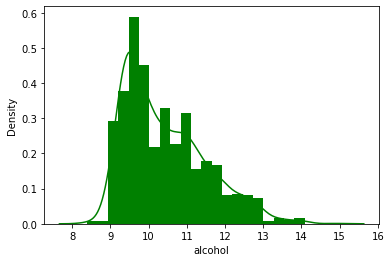

In [17]:
sn.distplot(df["alcohol"], hist_kws={'alpha':1}, color='g')

<AxesSubplot:xlabel='quality', ylabel='Density'>

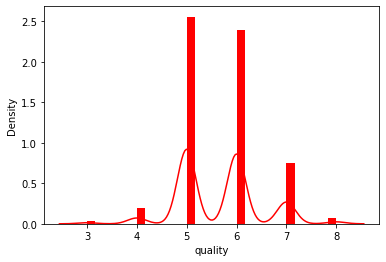

In [18]:
sn.distplot(df["quality"], hist_kws={'alpha':1}, color='r')

In [19]:
print("In the above displot, we observe No major skewness on Target column")

In the above displot, we observe No major skewness on Target column


# Boxplot

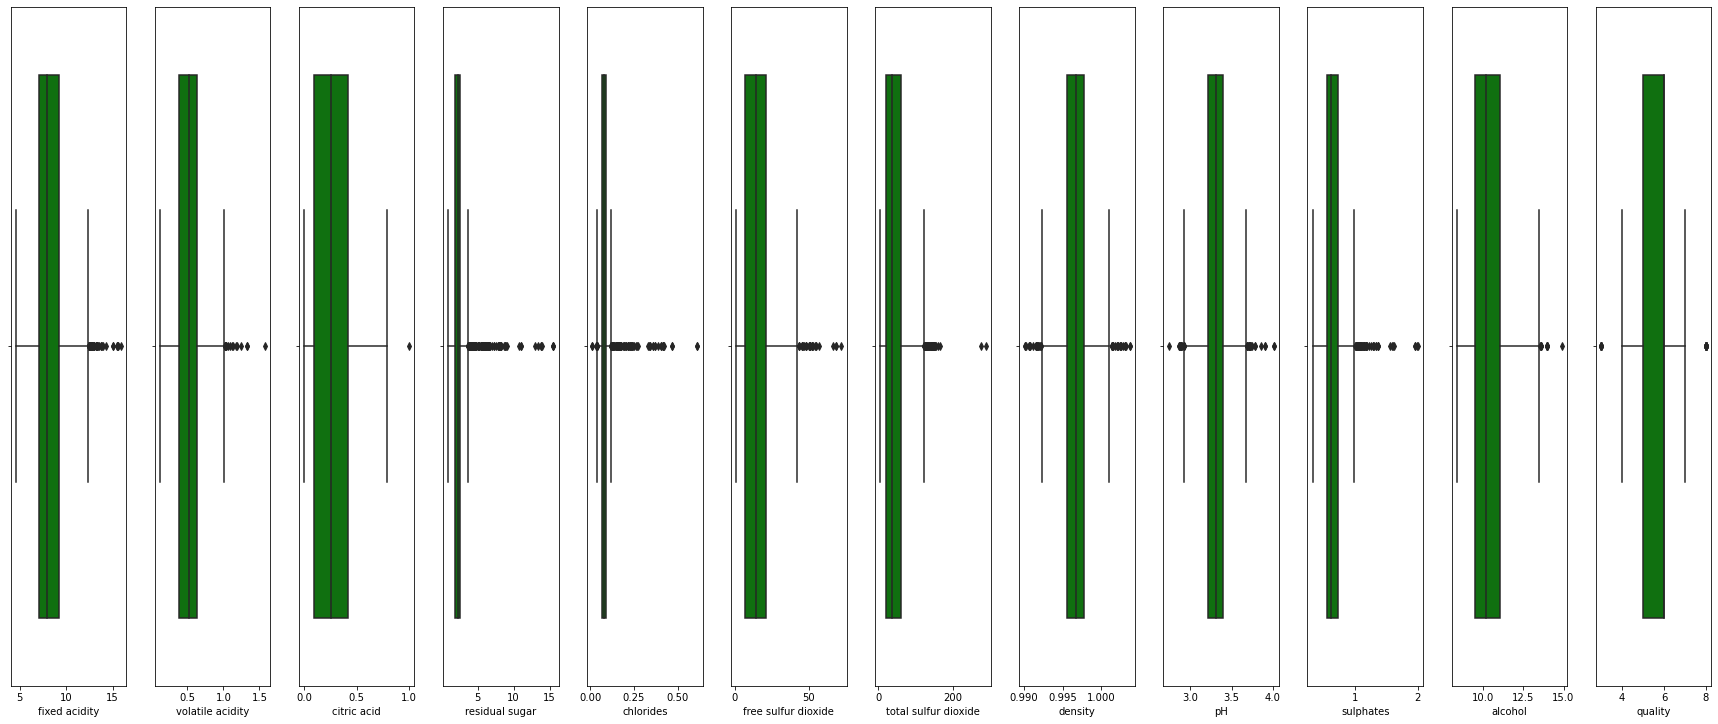

In [20]:
Columns = df.columns.values
ncolumns = 40
nrows = 20
plt.figure(figsize=(ncolumns*2,nrows*10))
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df[Columns[i]], color='green', orient='H')
    plt.tight_layout()

# Observation

* Outliers found on target variable ['quality']
* dependant columns with less Outliers ['citric acid', 'total sulphur dioxide', 'alcohol']
* dependant columns with more Outliers ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulphur dioxide', 'density', 'pH', 'Sulphates'] 

# Scatterplot

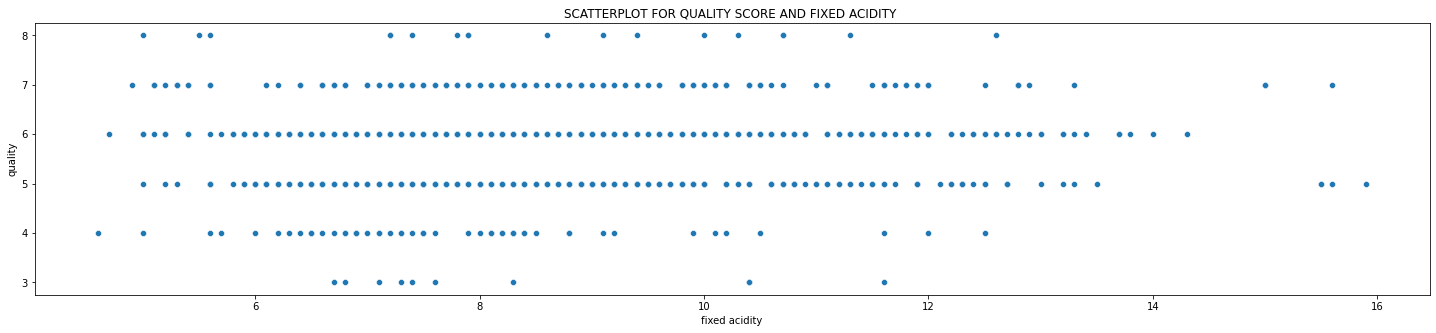

In [21]:
plt.figure(figsize=[25,5])

plt.title('SCATTERPLOT FOR QUALITY SCORE AND FIXED ACIDITY ')

sn.scatterplot(df['fixed acidity'], df['quality']);

* Here we observe that the highest distribution of data on fixed acidity values is on quality No 5,6,7

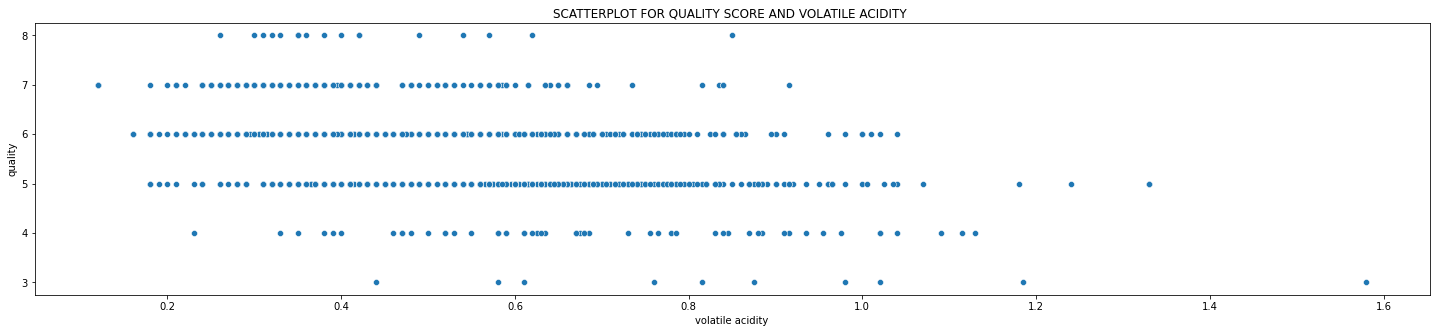

In [22]:
plt.figure(figsize=[25,5])

plt.title('SCATTERPLOT FOR QUALITY SCORE AND VOLATILE ACIDITY ')

sn.scatterplot(df['volatile acidity'], df['quality']);

* Here we observe that the highest distribution of data on volatile acidity values is on quality No 5,6,7

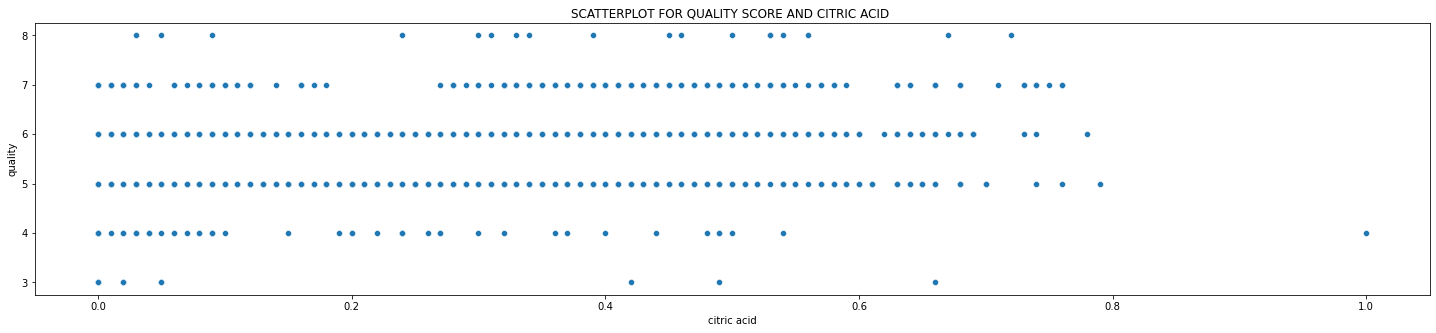

In [23]:
plt.figure(figsize=[25,5])

plt.title('SCATTERPLOT FOR QUALITY SCORE AND CITRIC ACID ')

sn.scatterplot(df['citric acid'], df['quality']);

* Here we observe that the highest distribution of data on citric acid values is on quality No 5,6,7 

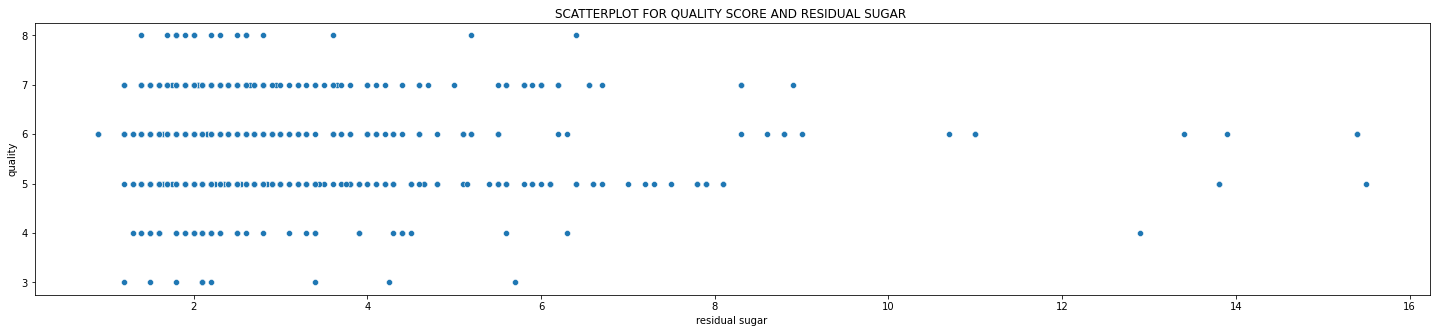

In [24]:
plt.figure(figsize=[25,5])

plt.title('SCATTERPLOT FOR QUALITY SCORE AND RESIDUAL SUGAR ')

sn.scatterplot(df['residual sugar'], df['quality']);

* Here we observe that the highest distribution of data on residual sugar values is on quality No 5,6,7 

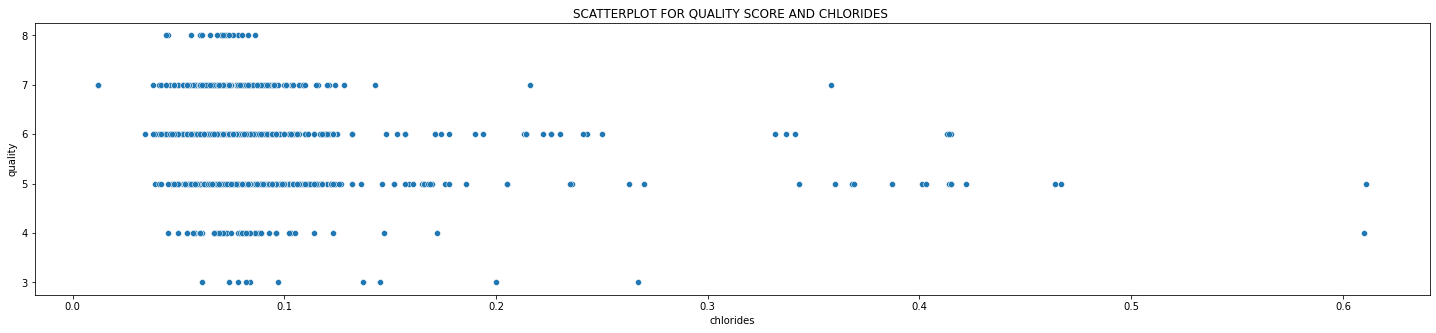

In [25]:
plt.figure(figsize=[25,5])

plt.title('SCATTERPLOT FOR QUALITY SCORE AND CHLORIDES ')

sn.scatterplot(df['chlorides'], df['quality']);

* Here we observe that the highest distribution of data on chlorides values is on quality No 5,6,7 

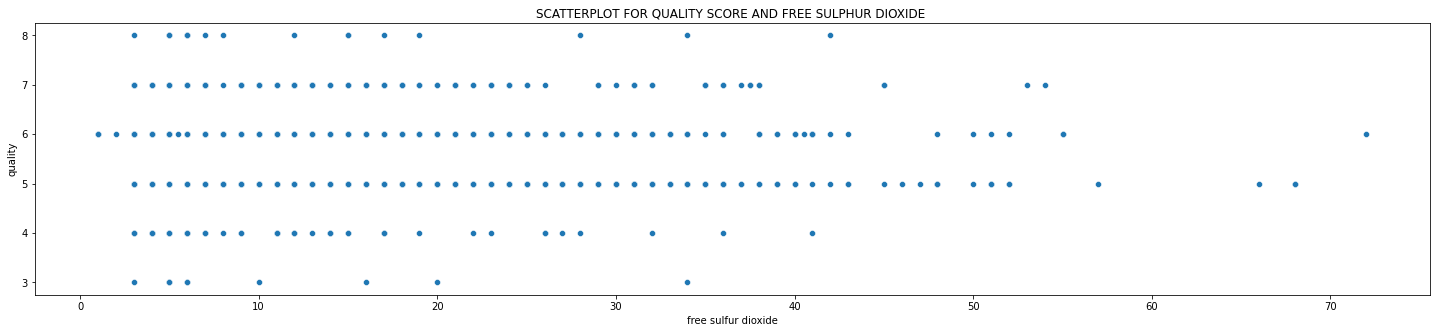

In [26]:
plt.figure(figsize=[25,5])

plt.title('SCATTERPLOT FOR QUALITY SCORE AND FREE SULPHUR DIOXIDE ')

sn.scatterplot(df['free sulfur dioxide'], df['quality']);

* Here we observe that the highest distribution of data on free sulfur dioxide values is on quality No 5,6,7 

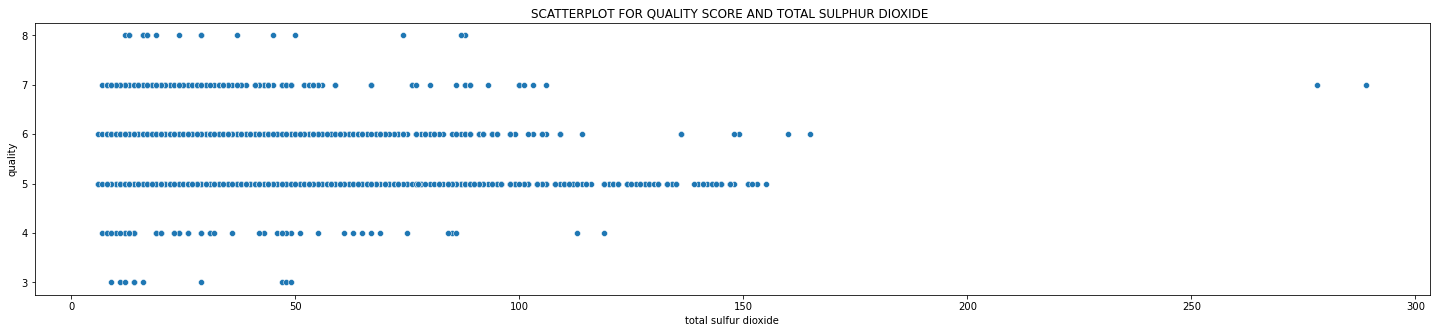

In [27]:
plt.figure(figsize=[25,5])

plt.title('SCATTERPLOT FOR QUALITY SCORE AND TOTAL SULPHUR DIOXIDE ')

sn.scatterplot(df['total sulfur dioxide'], df['quality']);

* Here we observe that the highest distribution of data on total sulfur dioxide values is on quality No 5,6,7 

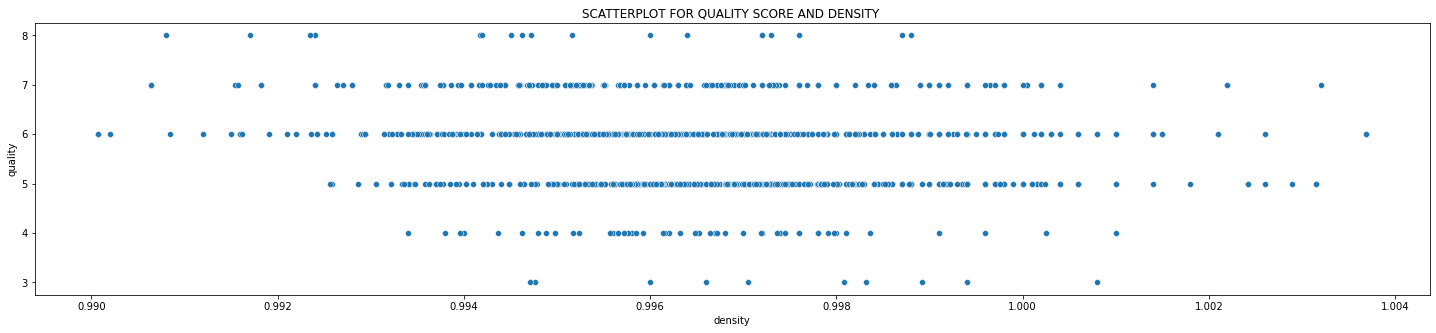

In [28]:
plt.figure(figsize=[25,5])

plt.title('SCATTERPLOT FOR QUALITY SCORE AND DENSITY ')

sn.scatterplot(df['density'], df['quality']);

* Here we observe that the highest distribution of data on density values is on quality No 5,6,7 

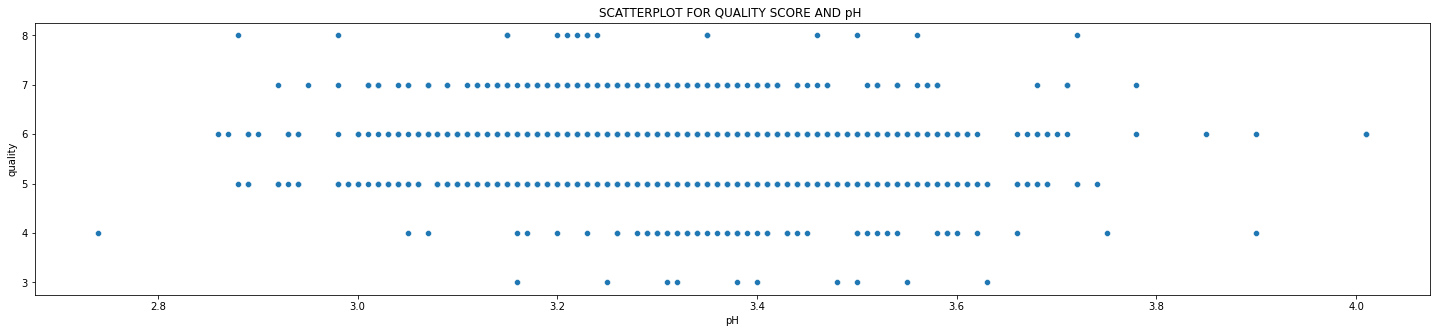

In [29]:
plt.figure(figsize=[25,5])

plt.title('SCATTERPLOT FOR QUALITY SCORE AND pH ')

sn.scatterplot(df['pH'], df['quality']);

* Here we observe that the highest distribution of data on pH values is on quality No 5,6,7 

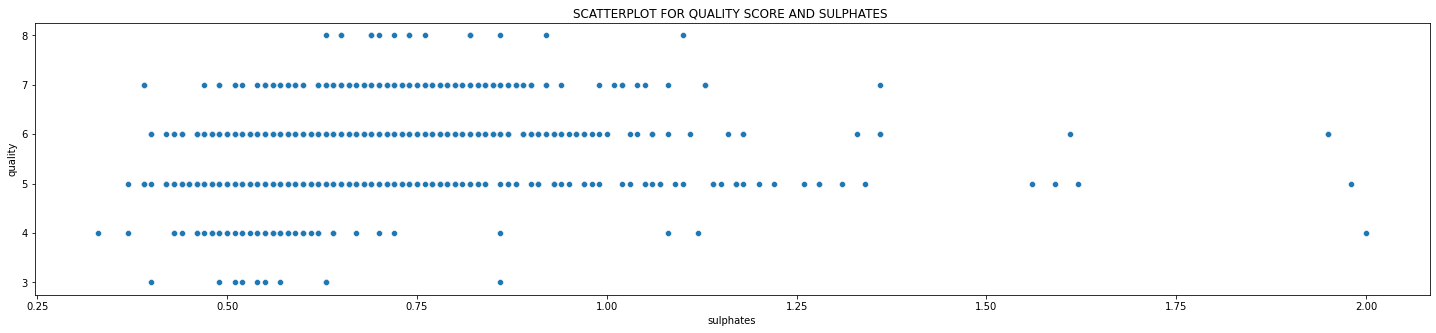

In [30]:
plt.figure(figsize=[25,5])

plt.title('SCATTERPLOT FOR QUALITY SCORE AND SULPHATES ')

sn.scatterplot(df['sulphates'], df['quality']);

* Here we observe that the highest distribution of data on sulphates values is on quality No 5,6,7 

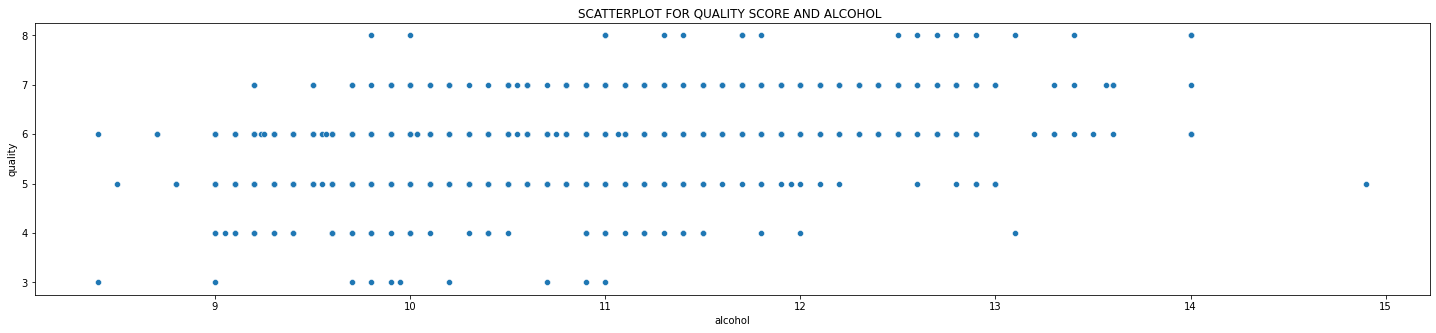

In [31]:
plt.figure(figsize=[25,5])

plt.title('SCATTERPLOT FOR QUALITY SCORE AND ALCOHOL ')

sn.scatterplot(df['alcohol'], df['quality']);

* Here we observe that the highest distribution of data on sulphates values is on quality No 5,6,7 

# Common Observation

* Quality No 5,6,7 has the highest distribution of data from the dependant Variables

# Pairplot

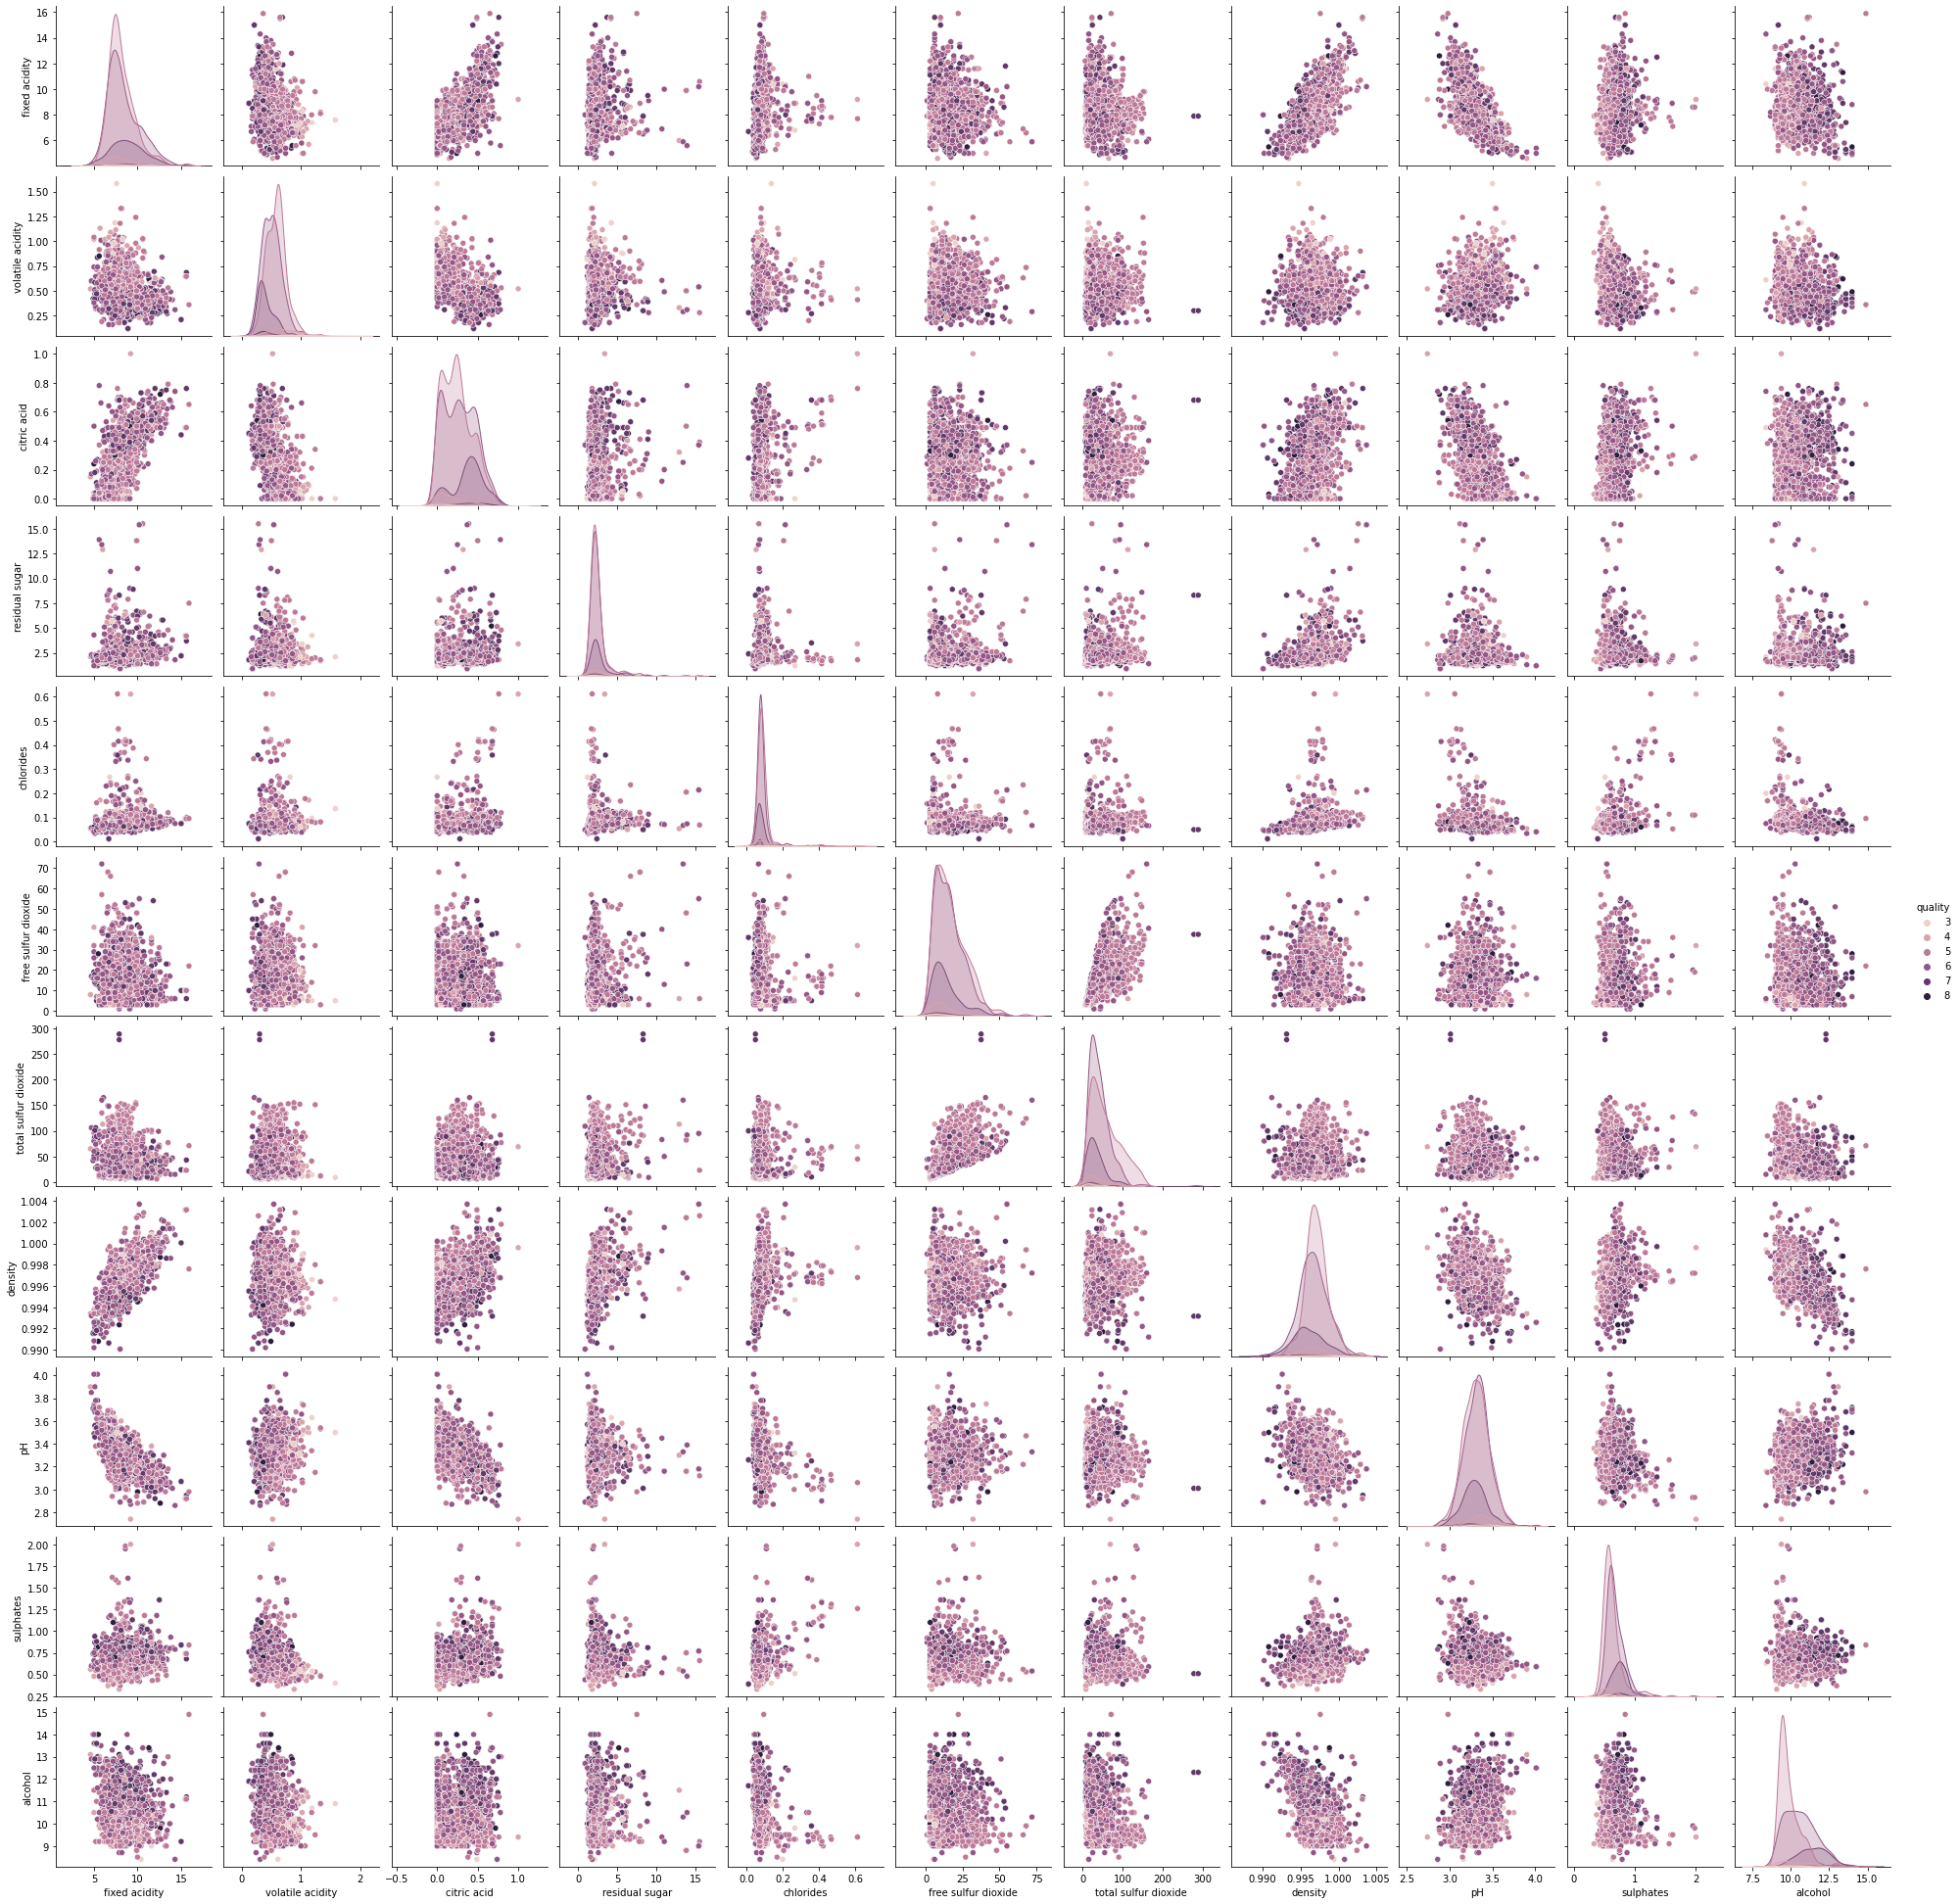

In [32]:
g = sn.pairplot(df, hue="quality")

# Observation

* Here we could observe that first being the pH and second being the density has the best distribution of data for all grades of wine quality

In [33]:
# Since we observe imbalannces on target variable we perform a balance check

c = df.columns.tolist()
c = [col for col in c if col not in ['quality']]

target = 'quality'

state = np.random.RandomState(42)
x = df[c]
y = df[target]

x_outliers = state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))
print(x.shape)

(1599, 11)


Text(0, 0.5, 'Frequency')

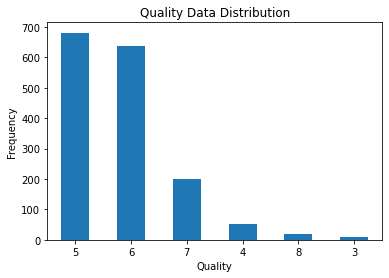

In [34]:
count_classes = pd.value_counts(df['quality'], sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("Quality Data Distribution")

plt.xlabel("Quality")
plt.ylabel("Frequency")

# Observation

* Here we observe data imbalance and majority of the wine from Portugal has a rating 5

In [35]:
NO3 = df[df['quality']==3]
NO3.shape

(10, 12)

In [36]:
NO4 = df[df['quality']==4]
NO4.shape

(53, 12)

In [37]:
NO5 = df[df['quality']==5]
NO5.shape

(681, 12)

In [38]:
NO6 = df[df['quality']==6]
NO6.shape

(638, 12)

In [39]:
NO7 = df[df['quality']==7]
NO7.shape

(199, 12)

In [40]:
NO8 = df[df['quality']==8]
NO8.shape

(18, 12)

* Here we see that the data record on wine quality on 3,4,5,6,7,8 is 10,53,681,638,199,18 respectively

# To perform Oversampling using SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
smk = SMOTE(random_state=45)
X_res,Y_res = smk.fit_resample(x,y)

In [43]:
X_res.shape

(4086, 11)

In [44]:
from collections import Counter
print('Original dataset shape{}'.format(Counter(y)))
print('Original dataset shape{}'.format(Counter(Y_res)))

Original dataset shapeCounter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Original dataset shapeCounter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


# Catplot

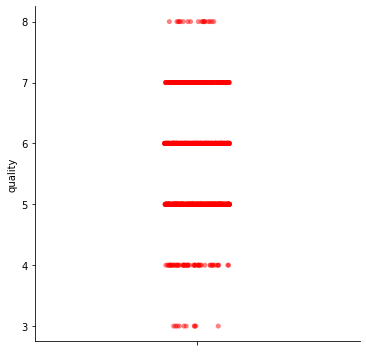

In [45]:

sn.catplot(y="quality", kind='strip', data=df, alpha=0.5, color='r')

* Here we observe majority of the data on wine quality distributed for 5,6,7 and No 5 has the over all highest thickness

# Countplot

In [46]:
print('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality')


fixed acidity volatile acidity citric acid residual sugar chlorides free sulfur dioxide total sulfur dioxide density pH sulphates alcohol quality


<AxesSubplot:xlabel='count', ylabel='fixed acidity'>

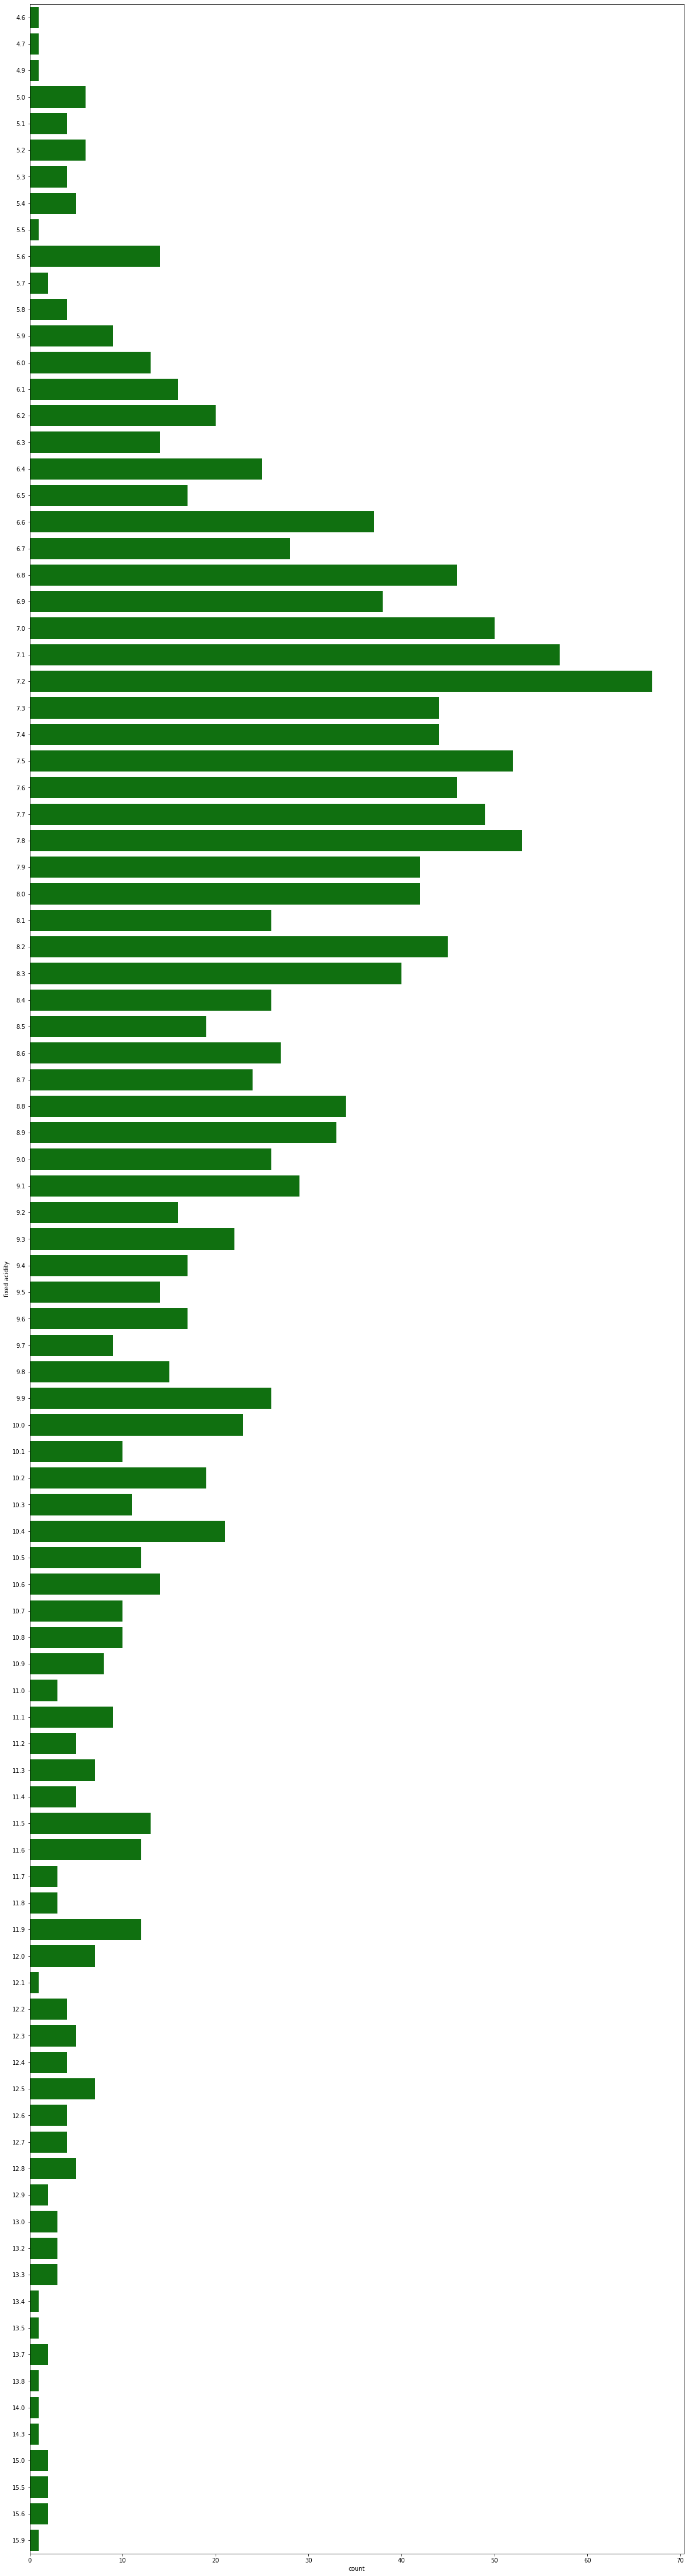

In [47]:
plt.figure(figsize=(20,80))

sn.countplot(y=df['fixed acidity'], data=df, color='g')

* Here we observe that fixed acidity value 7.2 has the highest distribution for the over all data

<AxesSubplot:xlabel='count', ylabel='volatile acidity'>

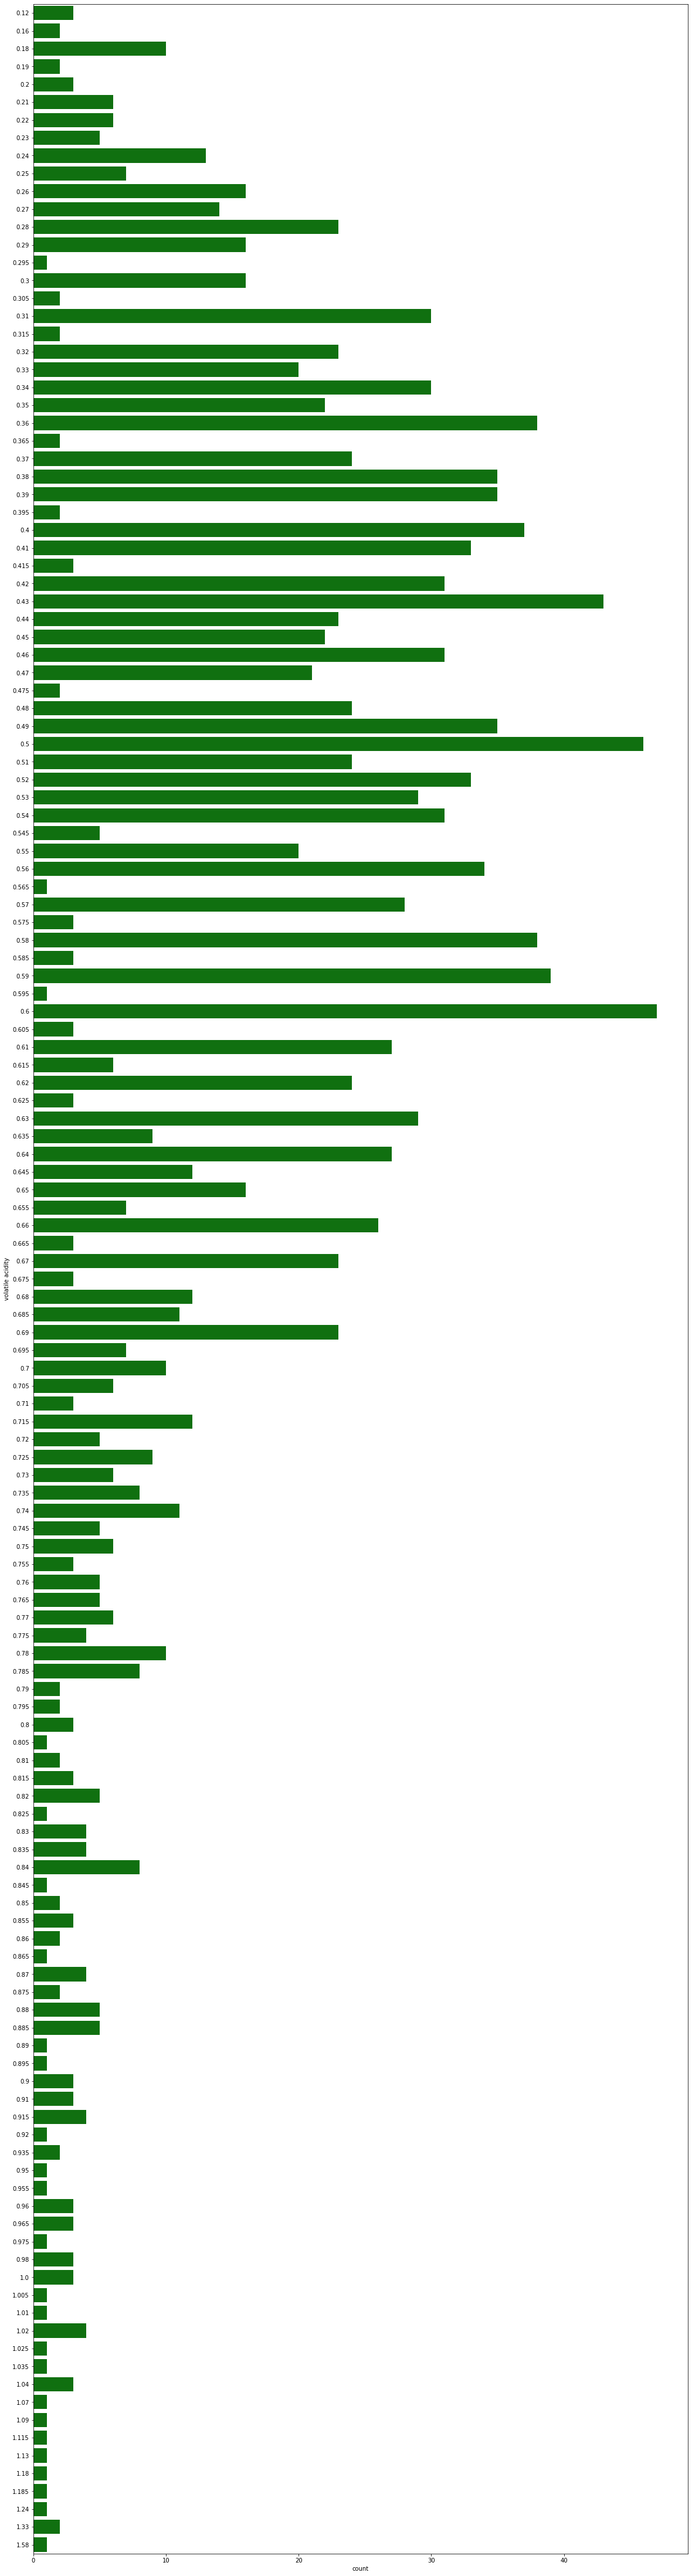

In [48]:
plt.figure(figsize=(20,80))

sn.countplot(y=df['volatile acidity'], data=df, color='g')

* Here we observe that volatile acidity values 0.6, 0.5 has the highest distribution for the over all data

<AxesSubplot:xlabel='count', ylabel='citric acid'>

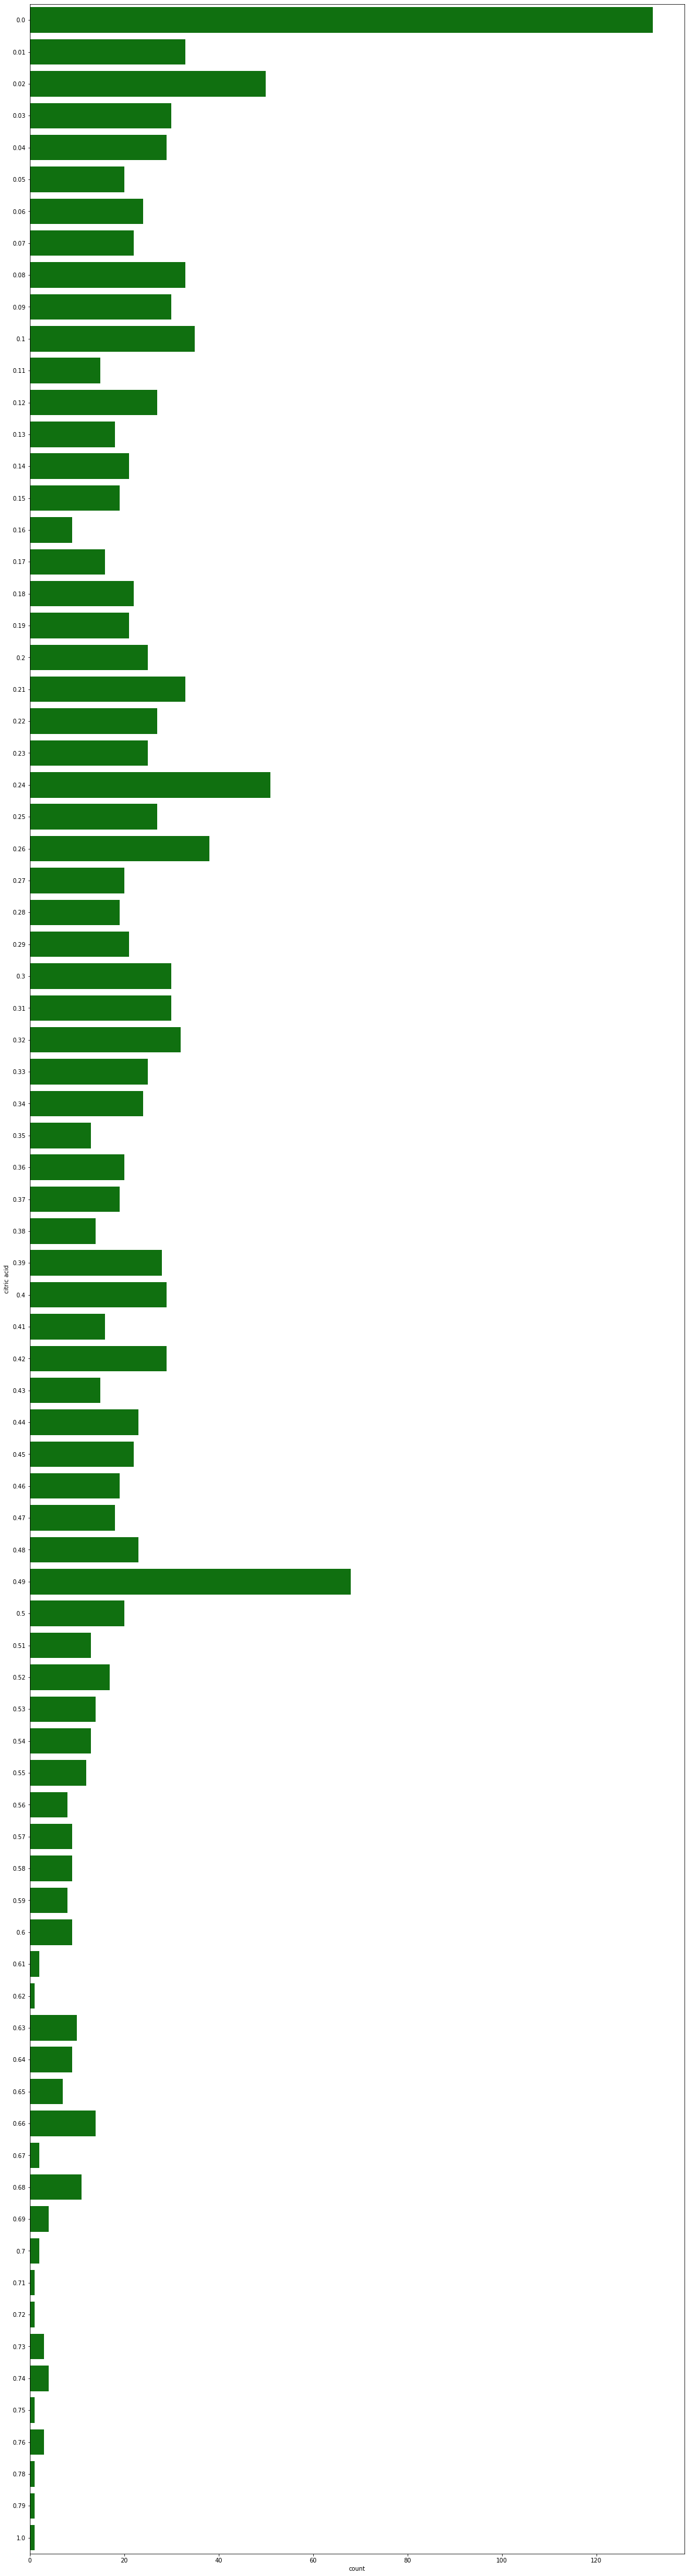

In [49]:
plt.figure(figsize=(20,80))

sn.countplot(y=df['citric acid'], data=df, color='g')

* Here we observe that citric acid value 0.0 has the highest distribution for the over all data

<AxesSubplot:xlabel='count', ylabel='residual sugar'>

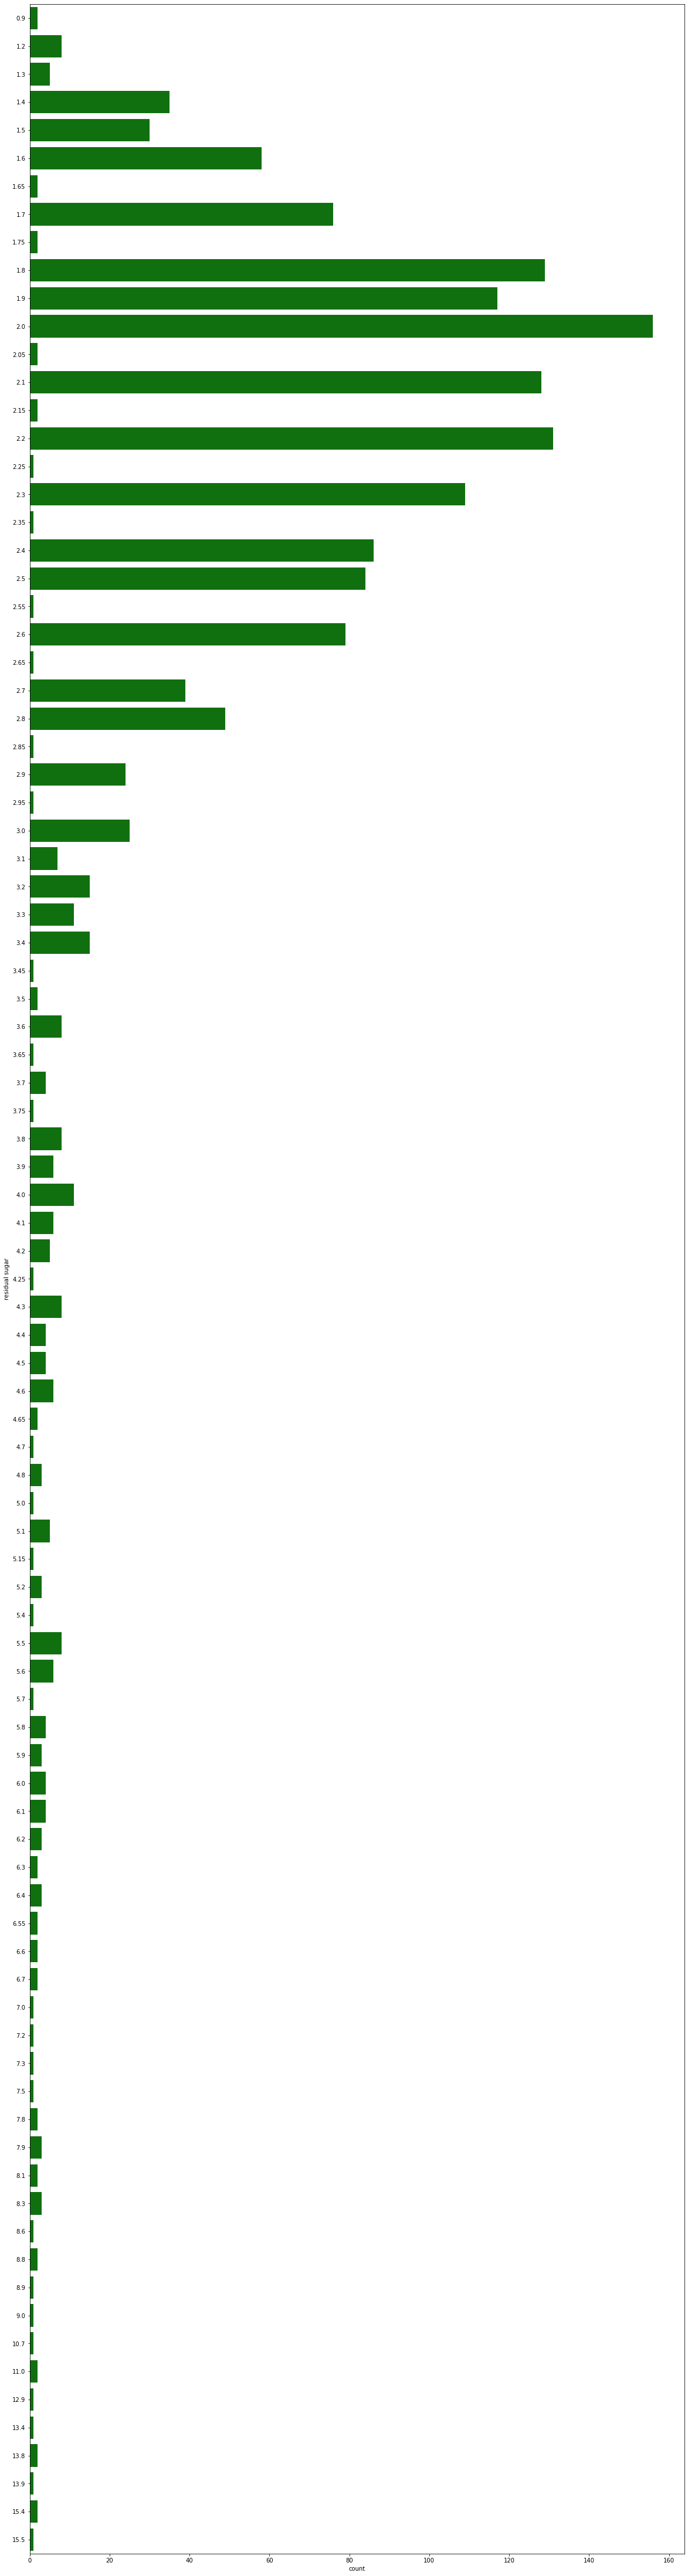

In [50]:
plt.figure(figsize=(20,80))

sn.countplot(y=df['residual sugar'], data=df, color='g')

* Here we observe that residual sugar value 2.0 has the highest distribution for the over all data

<AxesSubplot:xlabel='count', ylabel='chlorides'>

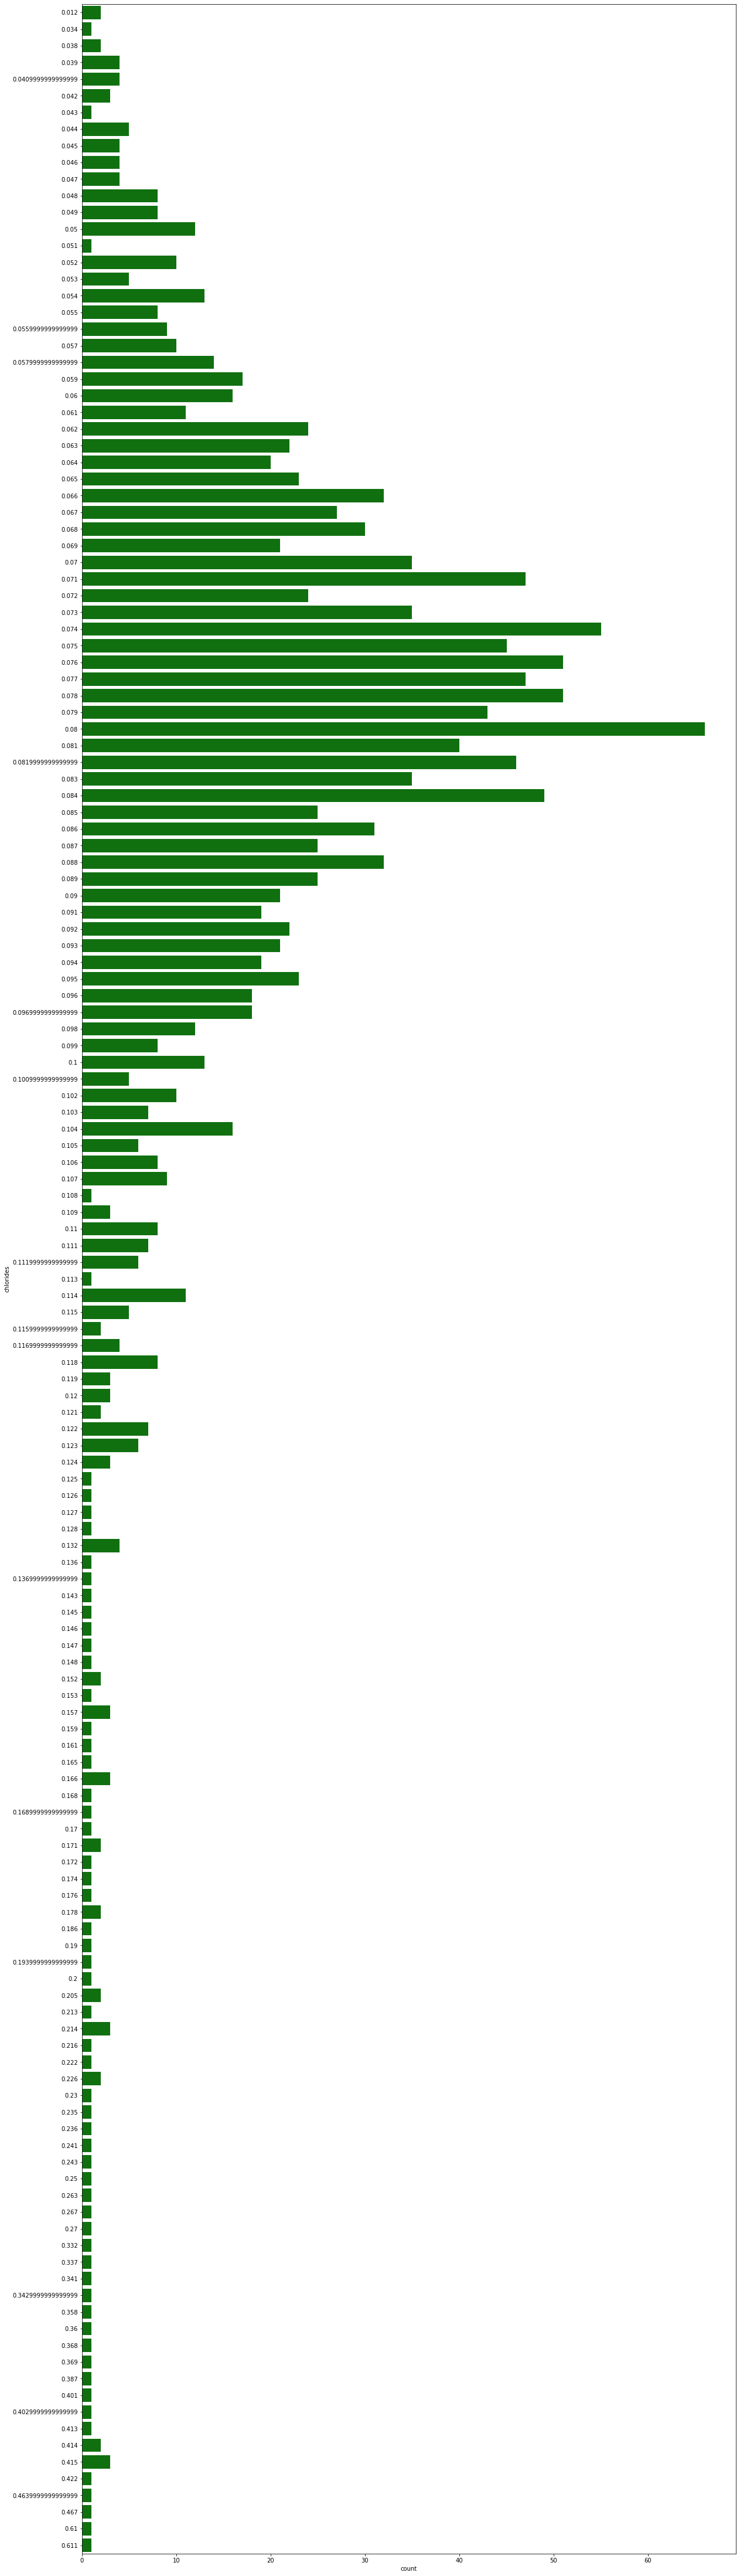

In [51]:
plt.figure(figsize=(20,80))

sn.countplot(y=df['chlorides'], data=df, color='g')

* Here we observe that chlorides value 0.08 has the highest distribution for the over all data

<AxesSubplot:xlabel='count', ylabel='free sulfur dioxide'>

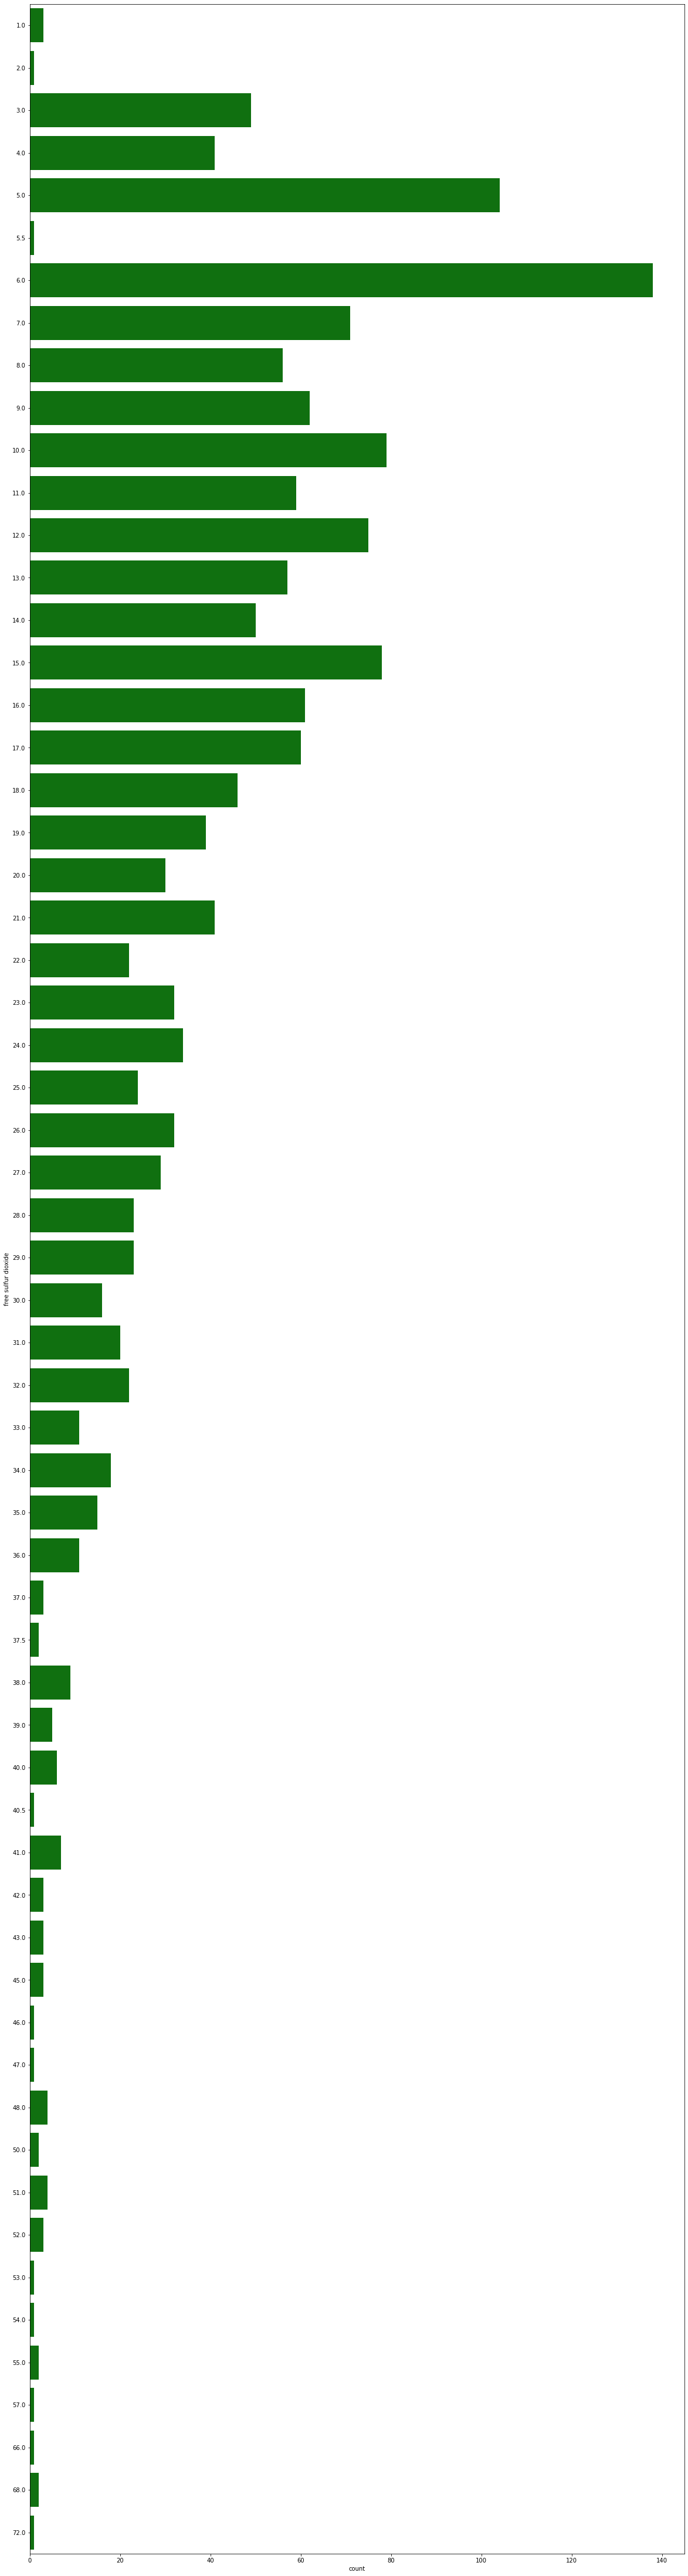

In [52]:
plt.figure(figsize=(20,80))

sn.countplot(y=df['free sulfur dioxide'], data=df, color='g')

* Here we observe that free sulfur dioxide value 6.0 has the highest distribution for the over all data

<AxesSubplot:xlabel='count', ylabel='total sulfur dioxide'>

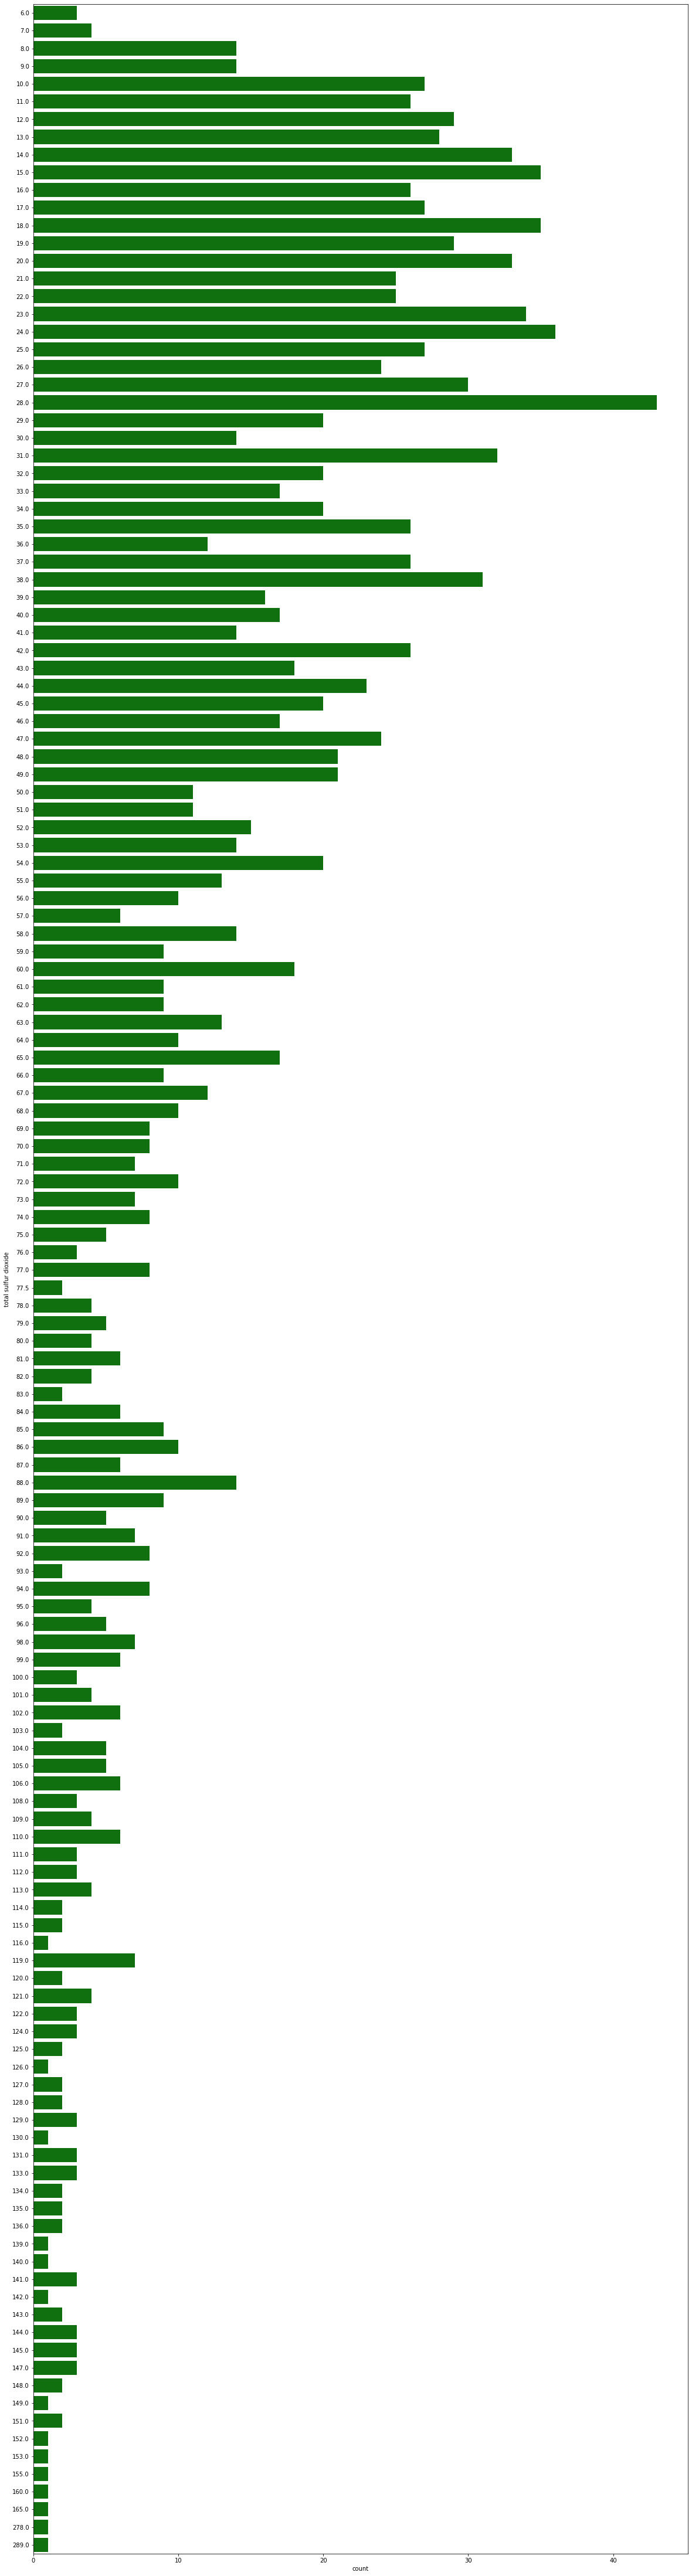

In [53]:
plt.figure(figsize=(20,80))

sn.countplot(y=df['total sulfur dioxide'], data=df, color='g')

* Here we observe that free total sulfur dioxide value 28.0 has the highest distribution for the over all data

<AxesSubplot:xlabel='count', ylabel='density'>

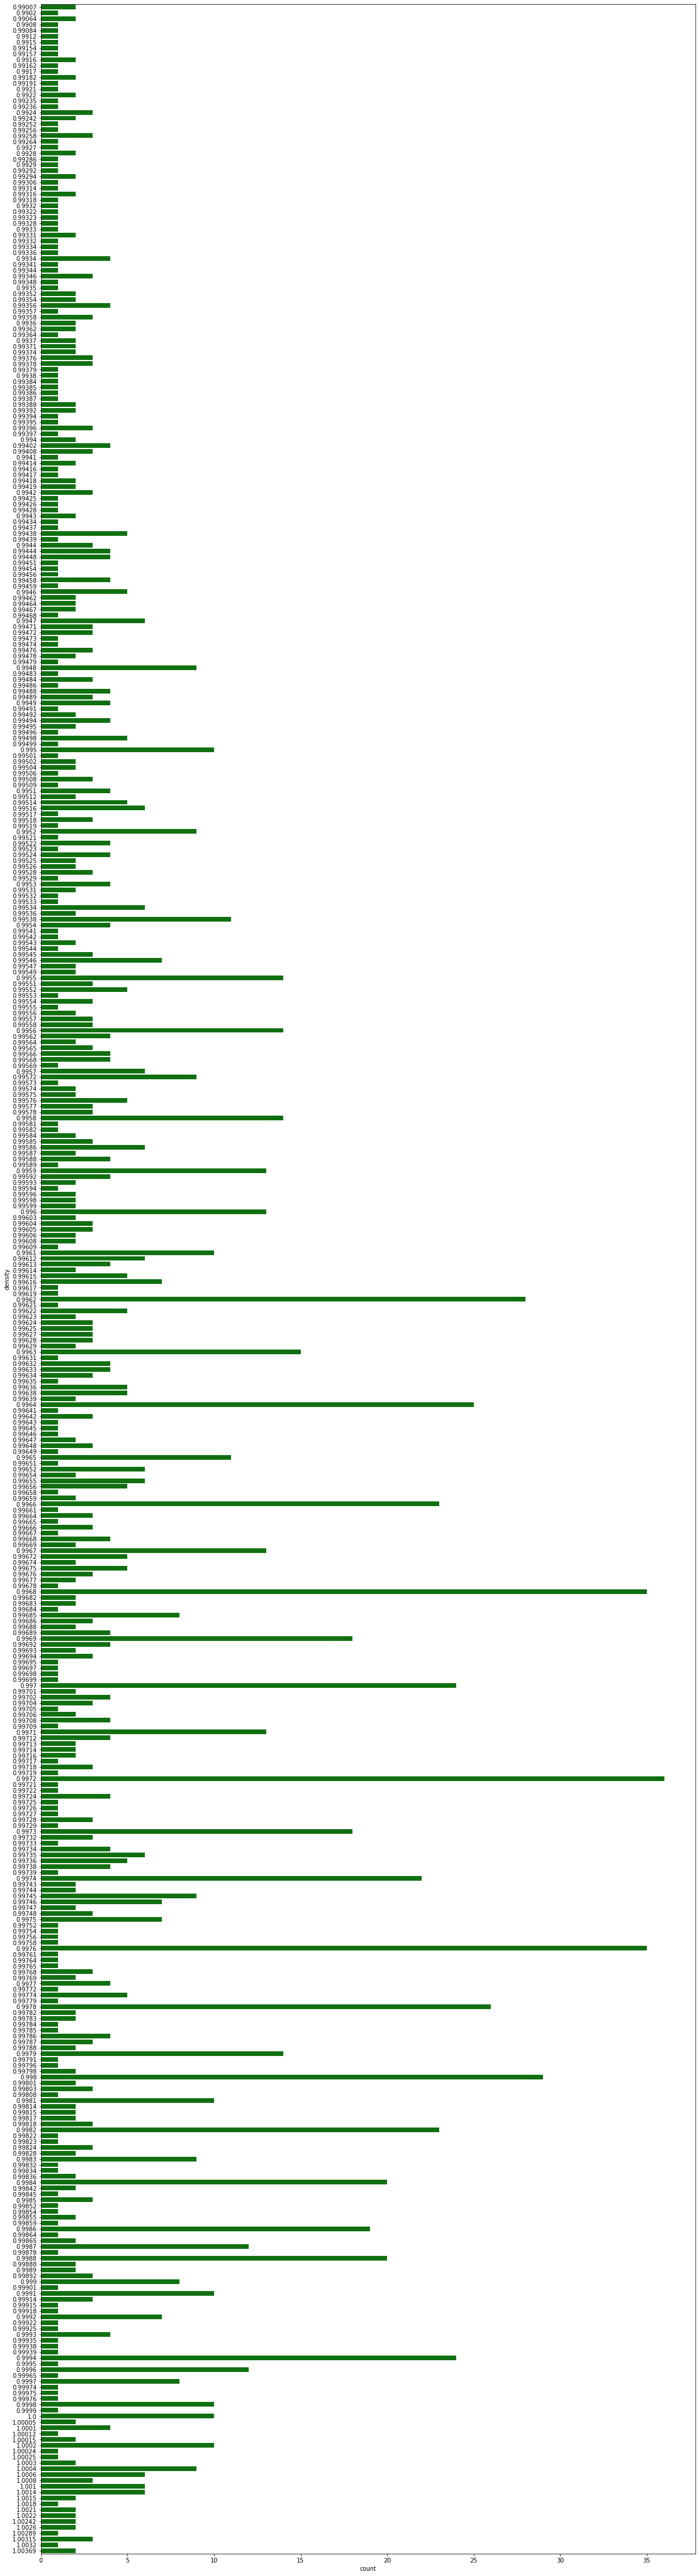

In [54]:
plt.figure(figsize=(20,80))

sn.countplot(y=df['density'], data=df, color='g')

* Here we observe that density values 0.9972, 0.9968 has the highest distribution for the over all data

<AxesSubplot:xlabel='count', ylabel='pH'>

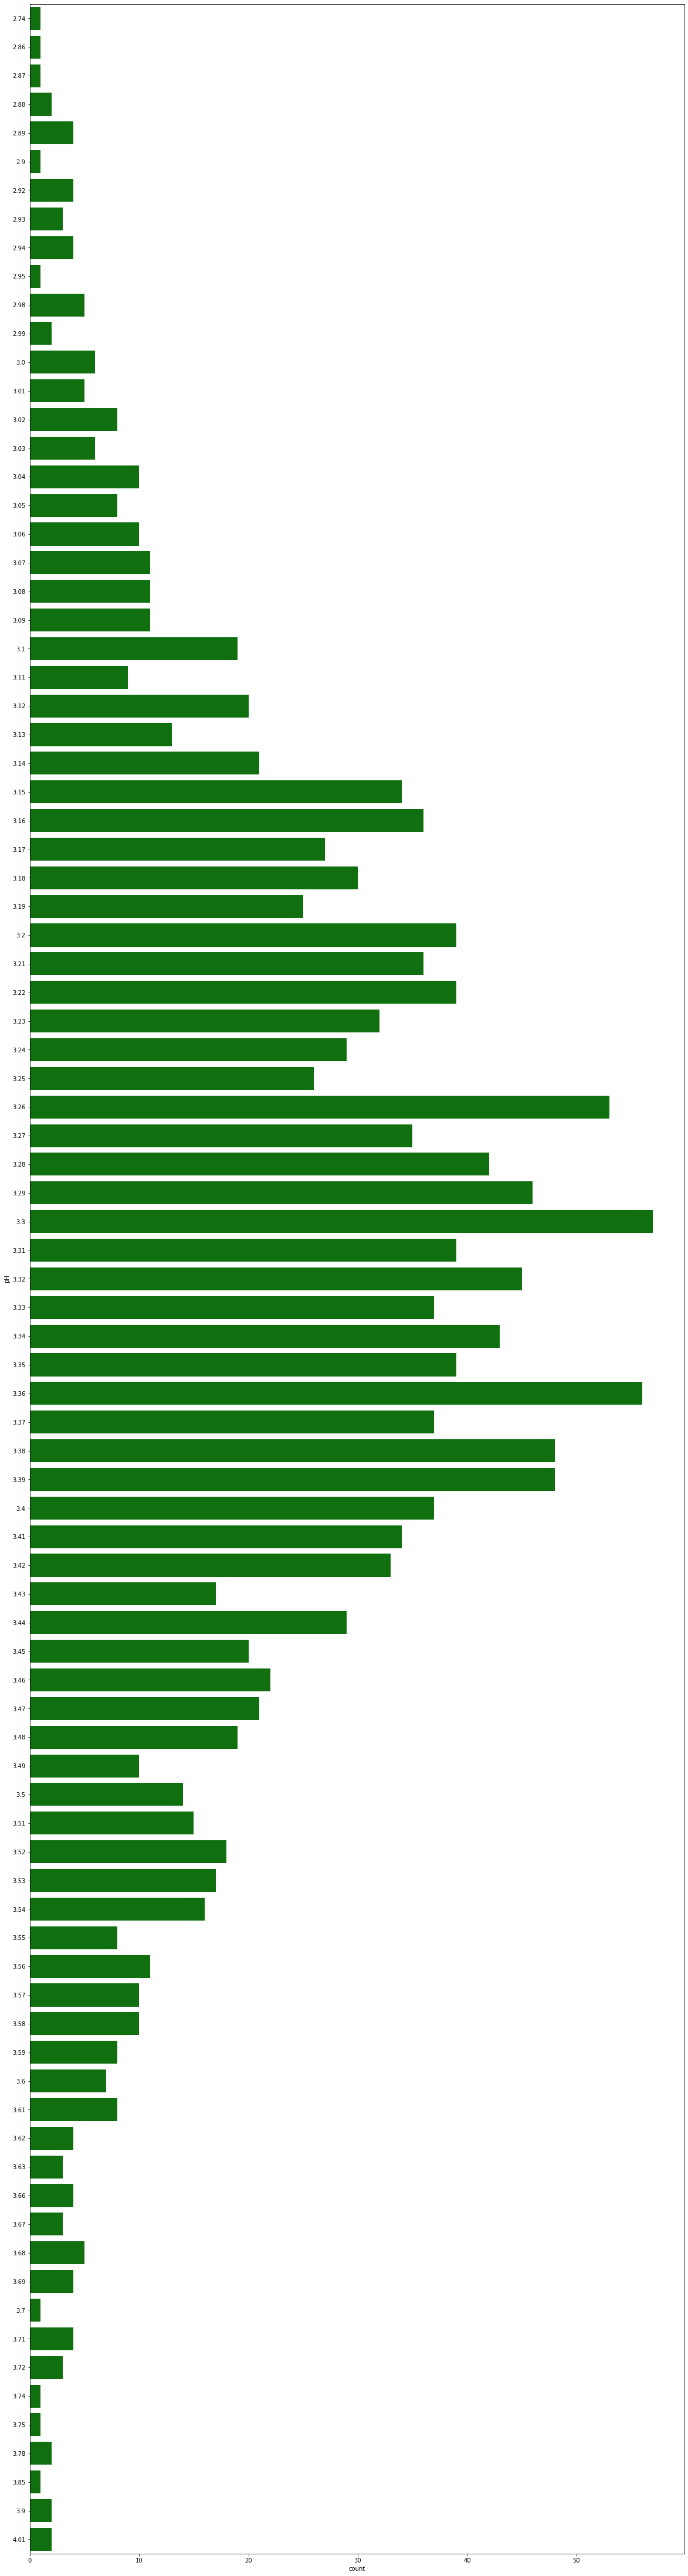

In [55]:
plt.figure(figsize=(20,80))

sn.countplot(y=df['pH'], data=df, color='g')

* Here we observe that pH values 3.3, 3.36 has the highest distribution for the over all data

<AxesSubplot:xlabel='count', ylabel='sulphates'>

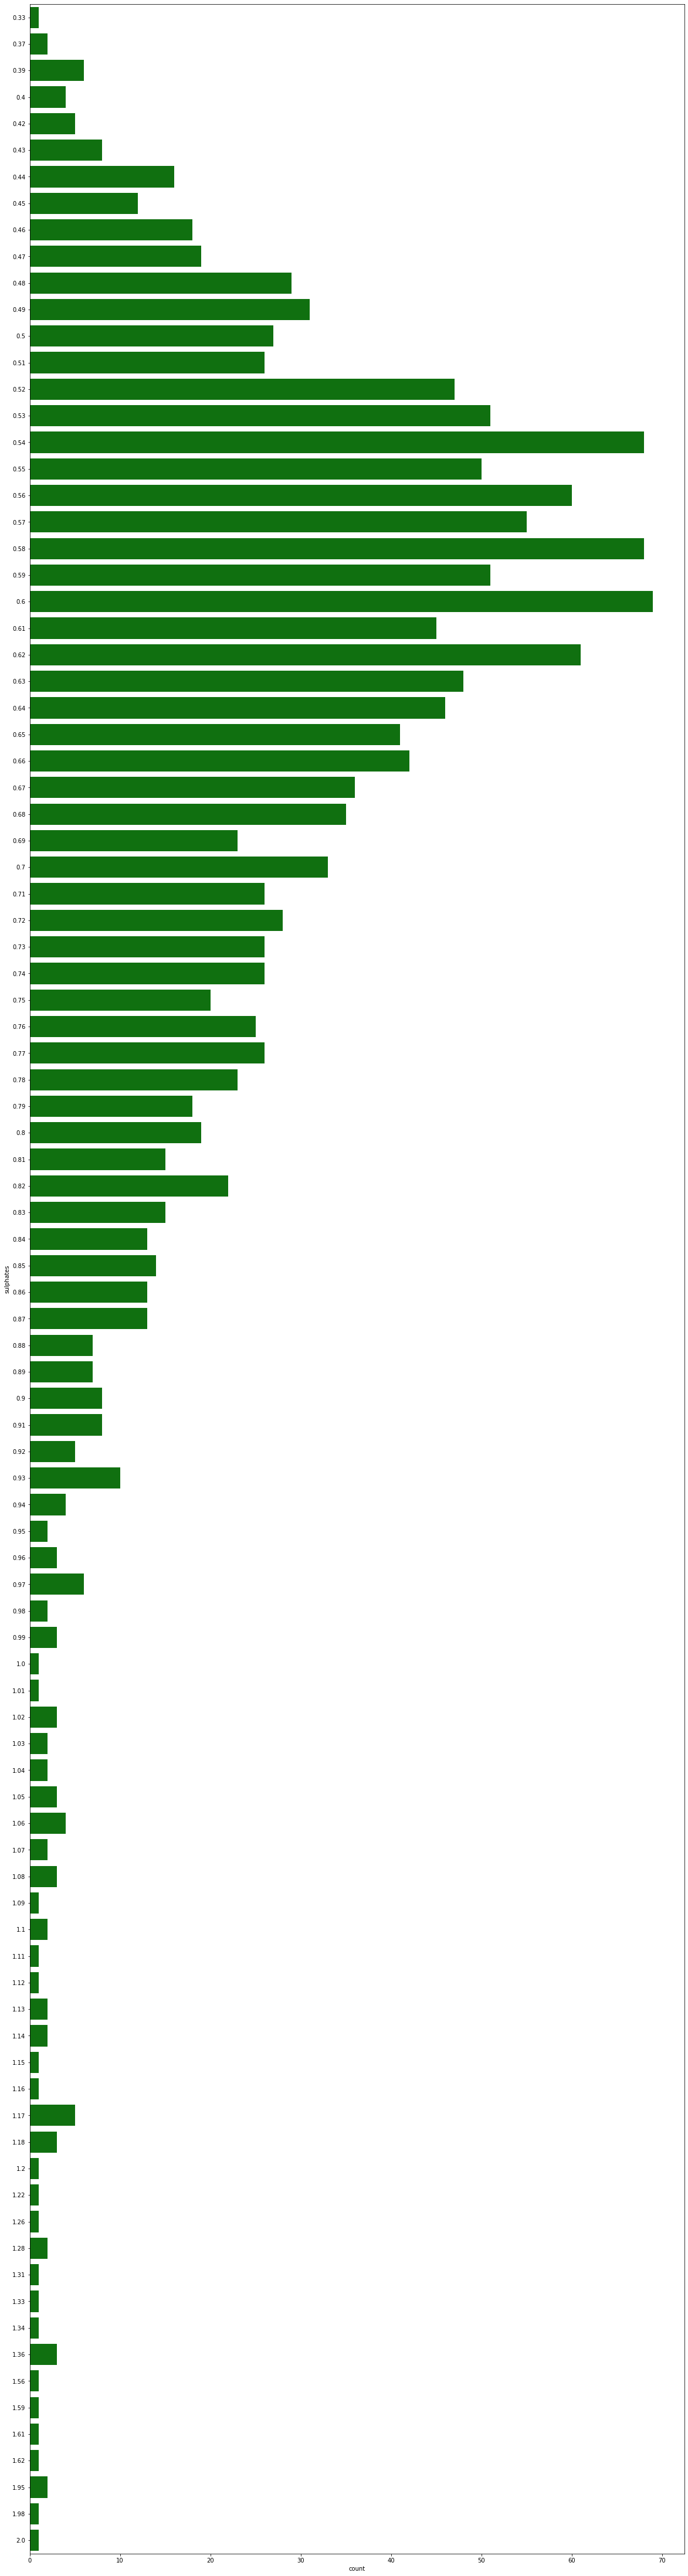

In [56]:
plt.figure(figsize=(20,80))

sn.countplot(y=df['sulphates'], data=df, color='g')

* Here we observe that sulphates values 0.54, 0.6 has the highest distribution for the over all data 

<AxesSubplot:xlabel='count', ylabel='alcohol'>

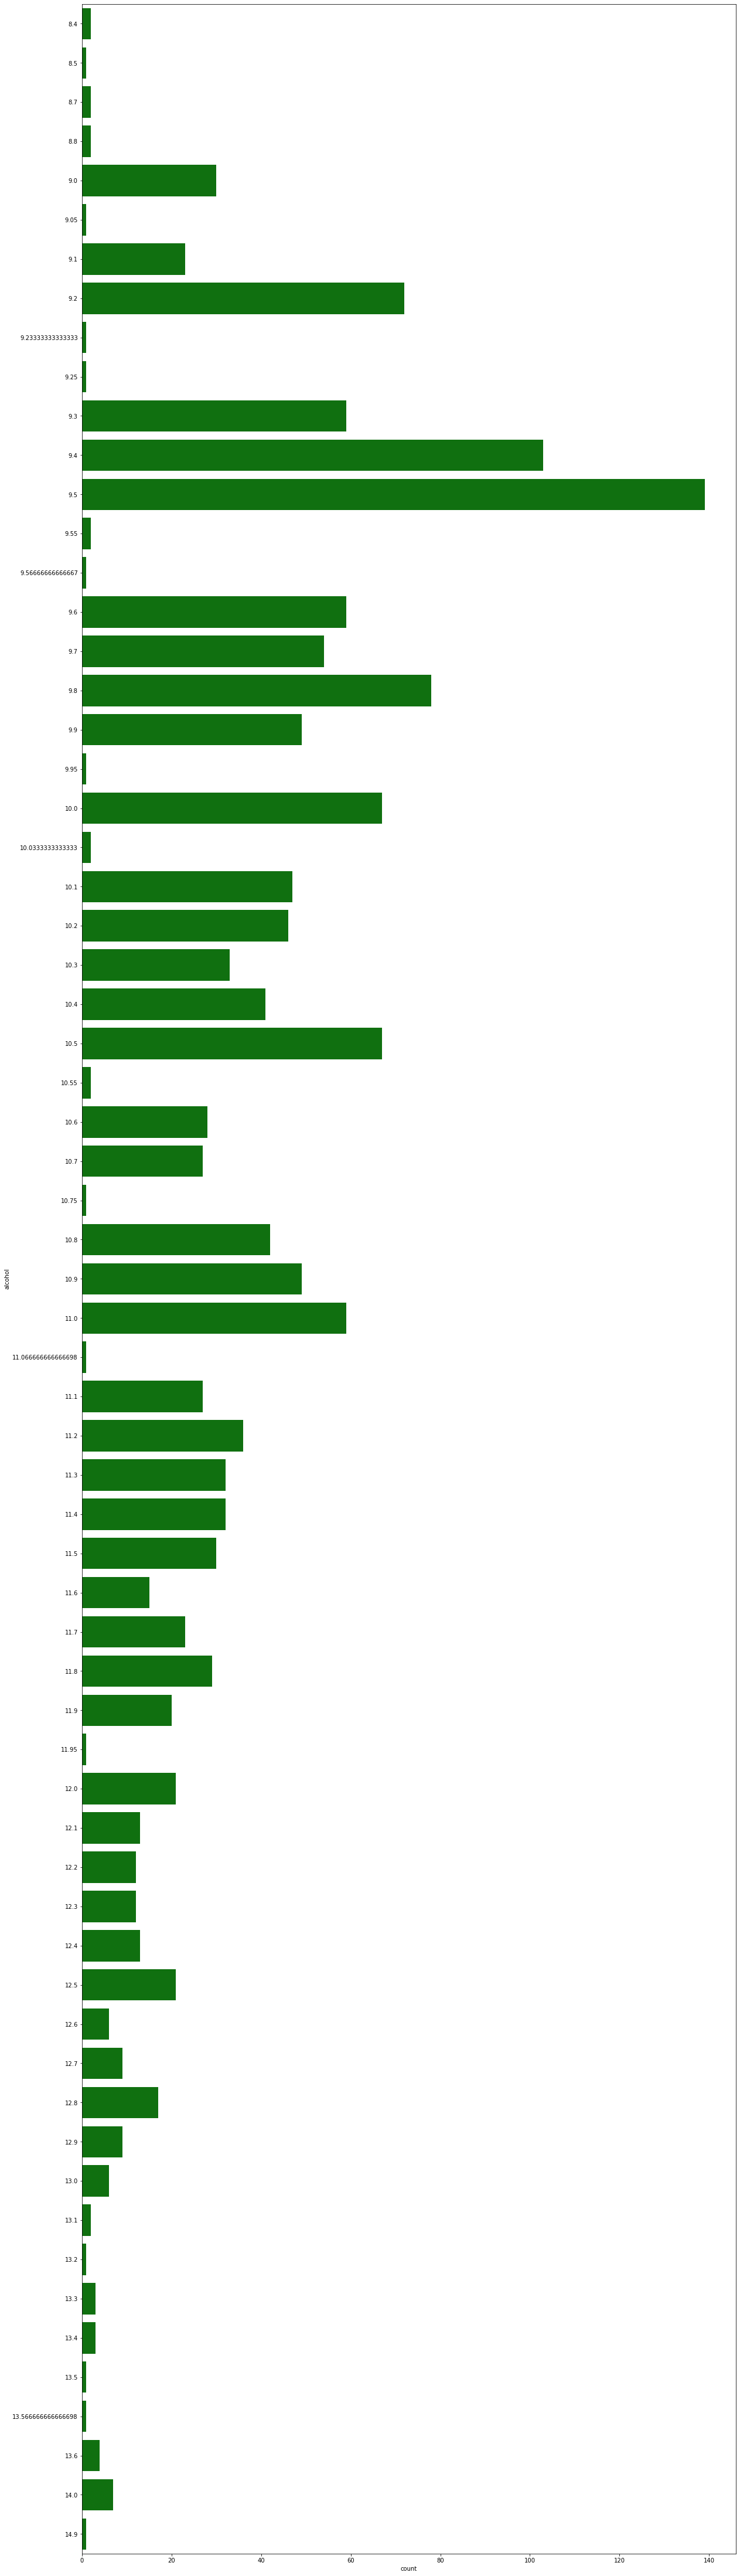

In [57]:
plt.figure(figsize=(20,80))

sn.countplot(y=df['alcohol'], data=df, color='g')

* Here we observe that alcohol values 9.5 has the highest distribution for the over all data 

In [58]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar    chlorides  \
count    1599.000000       1599.000000  1599.000000     1599.000000  1599.000000   
mean        8.319637          0.527821     0.270976        2.538806     0.087467   
std         1.741096          0.179060     0.194801        1.409928     0.047065   
min         4.600000          0.120000     0.000000        0.900000     0.012000   
25%         7.100000          0.390000     0.090000        1.900000     0.070000   
50%         7.900000          0.520000     0.260000        2.200000     0.079000   
75%         9.200000          0.640000     0.420000        2.600000     0.090000   
max        15.900000          1.580000     1.000000       15.500000     0.611000   

       free sulfur dioxide  total sulfur dioxide      density           pH    sulphates  \
count          1599.000000           1599.000000  1599.000000  1599.000000  1599.000000   
mean             15.874922             46.467792     0.996747     3.311113     0.658149   
std              10.460157             32.895324     0.001887     0.154386     0.169507   
min               1.000000              6.000000     0.990070     2.740000     0.330000   
25%               7.000000             22.000000     0.995600     3.210000     0.550000   
50%              14.000000             38.000000     0.996750     3.310000     0.620000   
75%              21.000000             62.000000     0.997835     3.400000     0.730000   
max              72.000000            289.000000     1.003690     4.010000     2.000000   

           alcohol      quality  
count  1599.000000  1599.000000  
mean     10.422983     5.636023  
std       1.065668     0.807569  
min       8.400000     3.000000  
25%       9.500000     5.000000  
50%      10.200000     6.000000  
75%      11.100000     6.000000  
max      14.900000     8.000000

# Stats Heatmap

<AxesSubplot:>

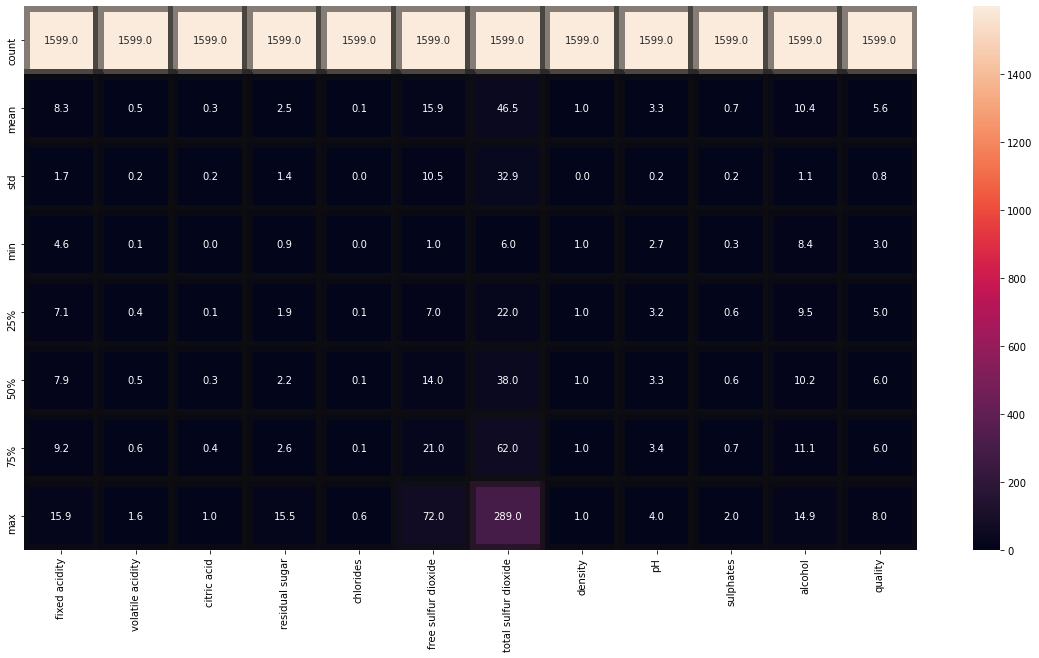

In [59]:
plt.figure(figsize=(20,10))
sn.heatmap(df.describe(), annot=True, linewidth=10, linecolor='#0f0f0f80', fmt='0.1f')

# Here we observe that in all Stats
* Total sulphur dioxide has higher Max value, STD value, mean value and 75%, 50%, 25% statistical percentile,  
* Citric acid having highest Min value


In [60]:
cor=df.corr()
cor

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
fixed acidity              1.000000         -0.256131     0.671703        0.114777   0.093705   
volatile acidity          -0.256131          1.000000    -0.552496        0.001918   0.061298   
citric acid                0.671703         -0.552496     1.000000        0.143577   0.203823   
residual sugar             0.114777          0.001918     0.143577        1.000000   0.055610   
chlorides                  0.093705          0.061298     0.203823        0.055610   1.000000   
free sulfur dioxide       -0.153794         -0.010504    -0.060978        0.187049   0.005562   
total sulfur dioxide      -0.113181          0.076470     0.035533        0.203028   0.047400   
density                    0.668047          0.022026     0.364947        0.355283   0.200632   
pH                        -0.682978          0.234937    -0.541904       -0.085652  -0.265026   
sulphates                  0.183006         -0.260987     0.312770        0.005527   0.371260   
alcohol                   -0.061668         -0.202288     0.109903        0.042075  -0.221141   
quality                    0.124052         -0.390558     0.226373        0.013732  -0.128907   

                      free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
fixed acidity                   -0.153794             -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                -0.010504              0.076470  0.022026  0.234937  -0.260987   
citric acid                     -0.060978              0.035533  0.364947 -0.541904   0.312770   
residual sugar                   0.187049              0.203028  0.355283 -0.085652   0.005527   
chlorides                        0.005562              0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide              1.000000              0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide             0.667666              1.000000  0.071269 -0.066495   0.042947   
density                         -0.021946              0.071269  1.000000 -0.341699   0.148506   
pH                               0.070377             -0.066495 -0.341699  1.000000  -0.196648   
sulphates                        0.051658              0.042947  0.148506 -0.196648   1.000000   
alcohol                         -0.069408             -0.205654 -0.496180  0.205633   0.093595   
quality                         -0.050656             -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

<AxesSubplot:>

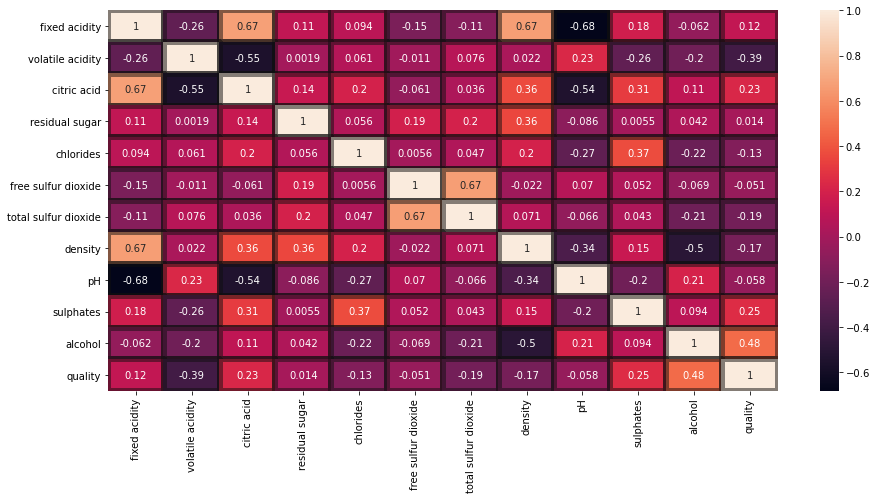

In [61]:
plt.figure(figsize=(15,7))
sn.heatmap(cor, annot=True, linewidth=5, linecolor='#0f0f0f80')

* Here in the Correlation heatmap we observe that the Correlation with Quality is strongest with Citric acid and weakest with Volatile Acidity

# To check the columns +ve and -ve correlated

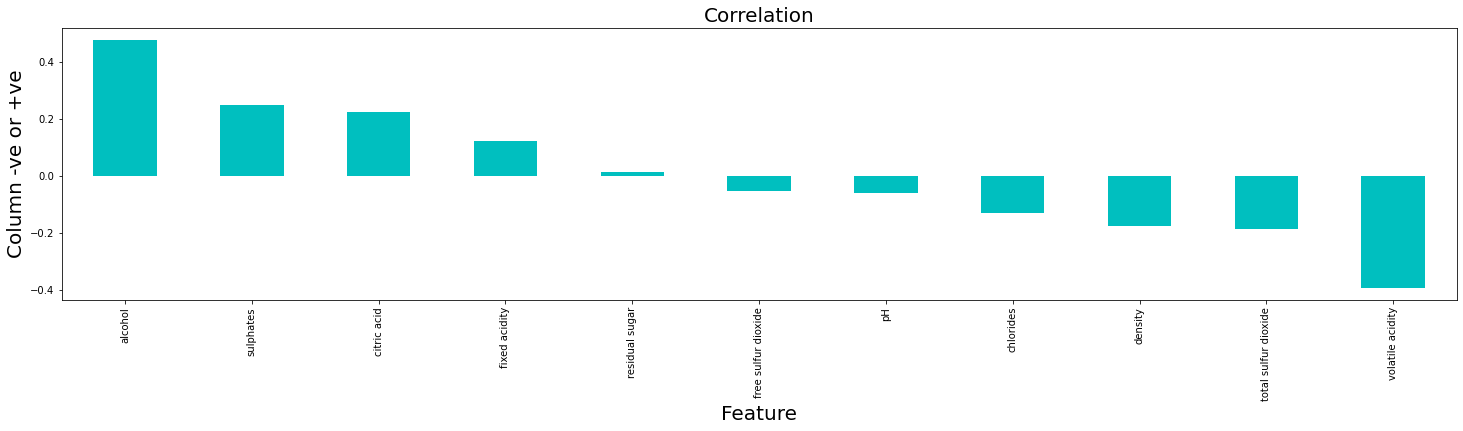

In [62]:
plt.figure(figsize=(25,5))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar', color='c')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Column -ve or +ve', fontsize=20)
plt.title('Correlation', fontsize=20)
plt.show()

# Observation

* Here we observe that columns ['alcohol, sulphates, citric acid, fixed acidity, residual sugar'] are +vely correlated and columns ['free sulphur dioxide, pH, chlorides, density, total sulphur dioxide, volatile acidity'] are -vely correlated

In [63]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# Observation

* Since our Skewness limit is btw +0.5 to -0.5 and skewness analysis shows Mild skewness for columns ['fixed acidity', 'volatile acidity', 'alcohol']    and major skewness for columns ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

# Here we apply multiple Transformation techniques

In [64]:
from scipy.stats import skew

In [65]:
df['fixed acidity'] = np.log(df['fixed acidity'])
F = df["fixed acidity"]
F1 = np.log(df["fixed acidity"])
skew(np.log(df["fixed acidity"]))

0.11273626506223082

In [66]:
df.skew()

fixed acidity           0.393915
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [67]:
df['volatile acidity'] = np.sqrt(df['volatile acidity'])
V = df["volatile acidity"]
V1 = np.sqrt(df["volatile acidity"])
skew(np.sqrt(df["volatile acidity"]))

-0.15991911014274535

In [68]:
df.skew()

fixed acidity           0.393915
volatile acidity        0.108355
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [69]:
df['residual sugar'] = np.reciprocal(df['residual sugar'])
RS = df["residual sugar"]
RS1 = np.reciprocal(df["residual sugar"])
skew(np.reciprocal(df["residual sugar"]))

4.536394788805639

In [70]:
df.skew()

fixed acidity           0.393915
volatile acidity        0.108355
citric acid             0.318337
residual sugar         -0.171202
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [71]:
df['chlorides'] = np.sqrt(df['chlorides'])
C = df["chlorides"]
C1 = np.sqrt(df["chlorides"])
skew(np.sqrt(df["chlorides"]))


df['chlorides'] = np.reciprocal(df['chlorides'])
H = df["chlorides"]
H1 = np.reciprocal(df["chlorides"])
skew(np.reciprocal(df["chlorides"]))

3.7053090550422665

In [72]:
df.skew()

fixed acidity           0.393915
volatile acidity        0.108355
citric acid             0.318337
residual sugar         -0.171202
chlorides               0.777550
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [73]:
df['free sulfur dioxide'] = np.sqrt(df['free sulfur dioxide'])
FS = df["free sulfur dioxide"]
FS1 = np.sqrt(df["free sulfur dioxide"])
skew(np.sqrt(df["free sulfur dioxide"]))

0.1296784480418631

In [74]:
df.skew()

fixed acidity           0.393915
volatile acidity        0.108355
citric acid             0.318337
residual sugar         -0.171202
chlorides               0.777550
free sulfur dioxide     0.483344
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [75]:
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide'])
TS = df["total sulfur dioxide"]
TS1 = np.log(df["total sulfur dioxide"])
skew(np.log(df["total sulfur dioxide"]))

-0.5056830795048574

In [76]:
df.skew()

fixed acidity           0.393915
volatile acidity        0.108355
citric acid             0.318337
residual sugar         -0.171202
chlorides               0.777550
free sulfur dioxide     0.483344
total sulfur dioxide   -0.079323
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [77]:
df['sulphates'] = np.reciprocal(df['sulphates'])
S = df["sulphates"]
S1 = np.reciprocal(df["sulphates"])
skew(np.reciprocal(df["sulphates"]))

2.426393455449087

In [78]:
df.skew()

fixed acidity           0.393915
volatile acidity        0.108355
citric acid             0.318337
residual sugar         -0.171202
chlorides               0.777550
free sulfur dioxide     0.483344
total sulfur dioxide   -0.079323
density                 0.071288
pH                      0.193683
sulphates              -0.023248
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [79]:
df['alcohol'] = np.log(df['alcohol'])
A = df["alcohol"]
A1 = np.log(df["alcohol"])
skew(np.log(df["alcohol"]))

0.5835548493382394

#  Final skewness results

In [80]:
df.skew()

fixed acidity           0.393915
volatile acidity        0.108355
citric acid             0.318337
residual sugar         -0.171202
chlorides               0.777550
free sulfur dioxide     0.483344
total sulfur dioxide   -0.079323
density                 0.071288
pH                      0.193683
sulphates              -0.023248
alcohol                 0.661856
quality                 0.217802
dtype: float64

* Here we observe that skewness is Removed and filtered from columns

# Outlier Removal

In [81]:
from scipy.stats import zscore
import numpy as np
Z = np.abs(zscore(df))
Z.shape

(1599, 12)

In [82]:
threshold = 3
print(np.where(Z>3))

(array([  17,   19,   42,   45,   81,   83,   86,   91,   92,   95,  106,
        126,  127,  142,  144,  151,  151,  151,  151,  169,  170,  181,
        226,  243,  244,  258,  281,  291,  396,  400,  442,  442,  451,
        459,  467,  480,  517,  554,  554,  555,  555,  557,  557,  588,
        608,  652,  652,  672,  690,  690,  692,  695,  695,  730,  754,
        821,  832,  836,  836,  837,  837,  889,  899,  948,  949,  950,
       1017, 1017, 1018, 1018, 1051, 1111, 1114, 1165, 1244, 1260, 1269,
       1269, 1270, 1270, 1287, 1299, 1299, 1300, 1312, 1316, 1319, 1321,
       1369, 1370, 1372, 1374, 1374, 1434, 1435, 1469, 1474, 1476, 1478,
       1505, 1558], dtype=int64), array([ 4,  4,  4,  8,  4,  4,  9,  9,  9,  8,  4,  1,  1, 10, 10,  2,  4,
        8,  9,  4,  9,  4,  4,  0,  0,  4,  4,  4,  5,  5,  0,  7,  4, 11,
       10,  7, 11,  0,  7,  0,  7,  0,  7, 10,  7,  0, 10,  1,  1, 11,  4,
        4,  8,  4,  4, 10, 11,  4,  7,  4,  7,  7, 11,  1,  1,  1,  3,  7,
        

In [83]:
new_df = df[(Z<3).all(axis=1)]
print(new_df.shape)

(1516, 12)


# DataLoss %

In [84]:
Loss = (1599/1451)/1599*100

In [85]:
Loss

0.06891798759476224

# Here we observe a Data Loss of 0.06 % after the removal of the Outliers

# Separating the Features columns and Target Column:

In [86]:
features=new_df.drop("quality",axis=1)
target=new_df["quality"]

# Classification Test Model 1

In [87]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [88]:
for i in range(0,500):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    LR.fit(features_train, target_train)
    pred_train=LR.predict(features_train)
    pred_test=LR.predict(features_test)
    print(f"At random state {i},the training accuracy is: {f1_score(target_train, pred_train, average='micro')}")
    print(f"At random state {i},the testing accuracy is: {f1_score(target_test, pred_test, average='micro')}")
    print("\n")

At random state 0,the training accuracy is: 0.5936675461741425
At random state 0,the testing accuracy is: 0.6121372031662269


At random state 1,the training accuracy is: 0.5998240985048373
At random state 1,the testing accuracy is: 0.575197889182058


At random state 2,the training accuracy is: 0.6015831134564644
At random state 2,the testing accuracy is: 0.5778364116094987


At random state 3,the training accuracy is: 0.5919085312225154
At random state 3,the testing accuracy is: 0.5910290237467019


At random state 4,the training accuracy is: 0.6024626209322779
At random state 4,the testing accuracy is: 0.6147757255936676


At random state 5,the training accuracy is: 0.5910290237467019
At random state 5,the testing accuracy is: 0.6174142480211082


At random state 6,the training accuracy is: 0.5848724714160071
At random state 6,the testing accuracy is: 0.5910290237467019


At random state 7,the training accuracy is: 0.6007036059806509
At random state 7,the testing accuracy is: 0.6015

At random state 64,the training accuracy is: 0.5963060686015831
At random state 64,the testing accuracy is: 0.6068601583113457


At random state 65,the training accuracy is: 0.6103781882145998
At random state 65,the testing accuracy is: 0.5672823218997362


At random state 66,the training accuracy is: 0.5760773966578716
At random state 66,the testing accuracy is: 0.6121372031662269


At random state 67,the training accuracy is: 0.604221635883905
At random state 67,the testing accuracy is: 0.5620052770448549


At random state 68,the training accuracy is: 0.5936675461741425
At random state 68,the testing accuracy is: 0.6121372031662269


At random state 69,the training accuracy is: 0.5954265611257695
At random state 69,the testing accuracy is: 0.58311345646438


At random state 70,the training accuracy is: 0.6024626209322779
At random state 70,the testing accuracy is: 0.5725593667546174


At random state 71,the training accuracy is: 0.6051011433597185
At random state 71,the testing accur

At random state 130,the training accuracy is: 0.6024626209322779
At random state 130,the testing accuracy is: 0.5593667546174143


At random state 131,the training accuracy is: 0.604221635883905
At random state 131,the testing accuracy is: 0.58311345646438


At random state 132,the training accuracy is: 0.5866314863676341
At random state 132,the testing accuracy is: 0.5989445910290238


At random state 133,the training accuracy is: 0.5866314863676341
At random state 133,the testing accuracy is: 0.5725593667546174


At random state 134,the training accuracy is: 0.6068601583113457
At random state 134,the testing accuracy is: 0.5963060686015831


At random state 135,the training accuracy is: 0.5954265611257695
At random state 135,the testing accuracy is: 0.5804749340369393


At random state 136,the training accuracy is: 0.6086191732629728
At random state 136,the testing accuracy is: 0.575197889182058


At random state 137,the training accuracy is: 0.5963060686015831
At random state 137,th

At random state 193,the training accuracy is: 0.6015831134564644
At random state 193,the testing accuracy is: 0.6147757255936676


At random state 194,the training accuracy is: 0.6015831134564644
At random state 194,the testing accuracy is: 0.5672823218997362


At random state 195,the training accuracy is: 0.594547053649956
At random state 195,the testing accuracy is: 0.6147757255936676


At random state 196,the training accuracy is: 0.6103781882145998
At random state 196,the testing accuracy is: 0.5989445910290238


At random state 197,the training accuracy is: 0.6174142480211082
At random state 197,the testing accuracy is: 0.5382585751978892


At random state 198,the training accuracy is: 0.6033421284080914
At random state 198,the testing accuracy is: 0.5778364116094987


At random state 199,the training accuracy is: 0.5998240985048373
At random state 199,the testing accuracy is: 0.5804749340369393


At random state 200,the training accuracy is: 0.6051011433597185
At random state 200

At random state 258,the training accuracy is: 0.6103781882145998
At random state 258,the testing accuracy is: 0.5804749340369393


At random state 259,the training accuracy is: 0.5822339489885664
At random state 259,the testing accuracy is: 0.5910290237467019


At random state 260,the training accuracy is: 0.6226912928759895
At random state 260,the testing accuracy is: 0.554089709762533


At random state 261,the training accuracy is: 0.5910290237467019
At random state 261,the testing accuracy is: 0.6121372031662269


At random state 262,the training accuracy is: 0.6015831134564644
At random state 262,the testing accuracy is: 0.5963060686015831


At random state 263,the training accuracy is: 0.5963060686015831
At random state 263,the testing accuracy is: 0.5910290237467019


At random state 264,the training accuracy is: 0.5963060686015831
At random state 264,the testing accuracy is: 0.58311345646438


At random state 265,the training accuracy is: 0.6147757255936676
At random state 265,t

At random state 321,the training accuracy is: 0.5998240985048373
At random state 321,the testing accuracy is: 0.6068601583113457


At random state 322,the training accuracy is: 0.5910290237467019
At random state 322,the testing accuracy is: 0.6094986807387863


At random state 323,the training accuracy is: 0.5848724714160071
At random state 323,the testing accuracy is: 0.6121372031662269


At random state 324,the training accuracy is: 0.6059806508355321
At random state 324,the testing accuracy is: 0.554089709762533


At random state 325,the training accuracy is: 0.6130167106420404
At random state 325,the testing accuracy is: 0.5514511873350924


At random state 326,the training accuracy is: 0.6007036059806509
At random state 326,the testing accuracy is: 0.5989445910290238


At random state 327,the training accuracy is: 0.5892700087950747
At random state 327,the testing accuracy is: 0.6015831134564644


At random state 328,the training accuracy is: 0.6024626209322779
At random state 328

At random state 385,the testing accuracy is: 0.5857519788918206


At random state 386,the training accuracy is: 0.604221635883905
At random state 386,the testing accuracy is: 0.6068601583113457


At random state 387,the training accuracy is: 0.6130167106420404
At random state 387,the testing accuracy is: 0.604221635883905


At random state 388,the training accuracy is: 0.6007036059806509
At random state 388,the testing accuracy is: 0.5672823218997362


At random state 389,the training accuracy is: 0.6007036059806509
At random state 389,the testing accuracy is: 0.5883905013192612


At random state 390,the training accuracy is: 0.592788038698329
At random state 390,the testing accuracy is: 0.5989445910290238


At random state 391,the training accuracy is: 0.5989445910290238
At random state 391,the testing accuracy is: 0.5910290237467019


At random state 392,the training accuracy is: 0.6007036059806509
At random state 392,the testing accuracy is: 0.575197889182058


At random state 393,t

At random state 450,the training accuracy is: 0.5919085312225154
At random state 450,the testing accuracy is: 0.6094986807387863


At random state 451,the training accuracy is: 0.604221635883905
At random state 451,the testing accuracy is: 0.5936675461741425


At random state 452,the training accuracy is: 0.5963060686015831
At random state 452,the testing accuracy is: 0.5883905013192612


At random state 453,the training accuracy is: 0.6024626209322779
At random state 453,the testing accuracy is: 0.5620052770448549


At random state 454,the training accuracy is: 0.6007036059806509
At random state 454,the testing accuracy is: 0.5857519788918206


At random state 455,the training accuracy is: 0.5954265611257695
At random state 455,the testing accuracy is: 0.6015831134564644


At random state 456,the training accuracy is: 0.5936675461741425
At random state 456,the testing accuracy is: 0.6094986807387863


At random state 457,the training accuracy is: 0.5892700087950747
At random state 457

In [89]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=3)

In [90]:
LR.fit(features_train, target_train)

LogisticRegression()

In [91]:
pred_test=LR.predict(features_test)

In [92]:
print("Here we observe that we get : 59% accuracy for this model")
accuracy_score(target_test, pred_test)

Here we observe that we get : 59% accuracy for this model


0.5910290237467019

In [93]:
print("Here we see that f1 score is giving : 59% compared to the 59% accuracy score")
f1_score(target_test, pred_test, average='micro')

Here we see that f1 score is giving : 59% compared to the 59% accuracy score


0.5910290237467019

In [94]:
print(confusion_matrix(target_test, pred_test))
print(classification_report(target_test, pred_test))

[[  0  11   3   0   0]
 [  0 114  52   0   0]
 [  0  36 104   7   0]
 [  0   4  39   6   0]
 [  0   0   2   1   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.69      0.69      0.69       166
           6       0.52      0.71      0.60       147
           7       0.43      0.12      0.19        49
           8       0.00      0.00      0.00         3

    accuracy                           0.59       379
   macro avg       0.33      0.30      0.30       379
weighted avg       0.56      0.59      0.56       379



# Cross-Validation the Model 1

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
lin_score = cross_val_score(LR,features,target,cv=5, scoring='neg_mean_absolute_error')
lin_score_n = -lin_score
lin_score_n

array([0.49013158, 0.44224422, 0.42574257, 0.44224422, 0.43894389])

In [97]:
print("Here we find the mean_score is at : 0.44% which is Ok for our model")
np.mean(lin_score_n)

Here we find the mean_score is at : 0.44% which is Ok for our model


0.4478612992878235

# Classification Test Model 2

In [98]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
SVC=SVC()

In [99]:
for i in range(0,100):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    SVC.fit(features_train, target_train)
    pred_train=SVC.predict(features_train)
    pred_test=SVC.predict(features_test)
    print(f"At random state {i},the training accuracy is: {f1_score(target_train, pred_train, average='micro')}")
    print(f"At random state {i},the testing accuracy is: {f1_score(target_test, pred_test, average='micro')}")
    print("\n")

At random state 0,the training accuracy is: 0.5681618293755497
At random state 0,the testing accuracy is: 0.6015831134564644


At random state 1,the training accuracy is: 0.5936675461741425
At random state 1,the testing accuracy is: 0.5461741424802111


At random state 2,the training accuracy is: 0.5901495162708883
At random state 2,the testing accuracy is: 0.5514511873350924


At random state 3,the training accuracy is: 0.58311345646438
At random state 3,the testing accuracy is: 0.5963060686015831


At random state 4,the training accuracy is: 0.5778364116094987
At random state 4,the testing accuracy is: 0.5989445910290238


At random state 5,the training accuracy is: 0.5760773966578716
At random state 5,the testing accuracy is: 0.5910290237467019


At random state 6,the training accuracy is: 0.58311345646438
At random state 6,the testing accuracy is: 0.554089709762533


At random state 7,the training accuracy is: 0.5778364116094987
At random state 7,the testing accuracy is: 0.57255936

At random state 64,the training accuracy is: 0.5769569041336852
At random state 64,the testing accuracy is: 0.5620052770448549


At random state 65,the training accuracy is: 0.5910290237467019
At random state 65,the testing accuracy is: 0.5567282321899736


At random state 66,the training accuracy is: 0.5690413368513633
At random state 66,the testing accuracy is: 0.6068601583113457


At random state 67,the training accuracy is: 0.5883905013192612
At random state 67,the testing accuracy is: 0.5778364116094987


At random state 68,the training accuracy is: 0.5892700087950747
At random state 68,the testing accuracy is: 0.554089709762533


At random state 69,the training accuracy is: 0.5919085312225154
At random state 69,the testing accuracy is: 0.5620052770448549


At random state 70,the training accuracy is: 0.5804749340369393
At random state 70,the testing accuracy is: 0.5408970976253298


At random state 71,the training accuracy is: 0.575197889182058
At random state 71,the testing accu

In [100]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=3)

In [101]:
SVC.fit(features_train, target_train)

SVC()

In [102]:
pred_test=SVC.predict(features_test)

In [103]:
print("Here we observe that we get : 59% accuracy for this model")
accuracy_score(target_test, pred_test)

Here we observe that we get : 59% accuracy for this model


0.5963060686015831

In [104]:
print("Here we confirm that this model gives : 59% accuracy assuming average as micro argument on random state 3 ")
f1_score(target_test, pred_test, average='micro')

Here we confirm that this model gives : 59% accuracy assuming average as micro argument on random state 3 


0.5963060686015831

In [105]:
print(confusion_matrix(target_test, pred_test))
print(classification_report(target_test, pred_test))

[[  0   9   5   0   0]
 [  0 115  51   0   0]
 [  0  36 111   0   0]
 [  0   1  48   0   0]
 [  0   0   3   0   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.71      0.69      0.70       166
           6       0.51      0.76      0.61       147
           7       0.00      0.00      0.00        49
           8       0.00      0.00      0.00         3

    accuracy                           0.60       379
   macro avg       0.24      0.29      0.26       379
weighted avg       0.51      0.60      0.54       379



# Cross-Validation the Model 2

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
lin_score = cross_val_score(SVC,features,target,cv=5, scoring='neg_mean_absolute_error')
lin_score_n = -lin_score
lin_score_n

array([0.45065789, 0.42574257, 0.45214521, 0.51155116, 0.48184818])

In [108]:
print("Here we find the mean_score is at : 0.46 % which is Ok for our model")
np.mean(lin_score_n)

Here we find the mean_score is at : 0.46 % which is Ok for our model


0.46438900468994265

# Classification Test Model 3

In [109]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

DTC=SGDClassifier()

In [110]:
for i in range(0,500):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    DTC.fit(features_train, target_train)
    pred_train=DTC.predict(features_train)
    pred_test=DTC.predict(features_test)
    print(f"At random state {i},the training accuracy is: {f1_score(target_train, pred_train, average='micro')}")
    print(f"At random state {i},the testing accuracy is: {f1_score(target_test, pred_test, average='micro')}")
    print("\n")

At random state 0,the training accuracy is: 0.4916446789797713
At random state 0,the testing accuracy is: 0.48548812664907653


At random state 1,the training accuracy is: 0.5057167985927881
At random state 1,the testing accuracy is: 0.5013192612137203


At random state 2,the training accuracy is: 0.41424802110817943
At random state 2,the testing accuracy is: 0.41688654353562005


At random state 3,the training accuracy is: 0.5408970976253298
At random state 3,the testing accuracy is: 0.5778364116094987


At random state 4,the training accuracy is: 0.45118733509234826
At random state 4,the testing accuracy is: 0.41688654353562005


At random state 5,the training accuracy is: 0.5690413368513633
At random state 5,the testing accuracy is: 0.5699208443271768


At random state 6,the training accuracy is: 0.5118733509234829
At random state 6,the testing accuracy is: 0.46174142480211083


At random state 7,the training accuracy is: 0.5021987686895338
At random state 7,the testing accuracy is:

At random state 68,the training accuracy is: 0.5866314863676341
At random state 68,the testing accuracy is: 0.5989445910290238


At random state 69,the training accuracy is: 0.5787159190853123
At random state 69,the testing accuracy is: 0.5118733509234829


At random state 70,the training accuracy is: 0.5505716798592788
At random state 70,the testing accuracy is: 0.5171503957783641


At random state 71,the training accuracy is: 0.5303430079155673
At random state 71,the testing accuracy is: 0.554089709762533


At random state 72,the training accuracy is: 0.4731750219876869
At random state 72,the testing accuracy is: 0.48284960422163586


At random state 73,the training accuracy is: 0.4793315743183817
At random state 73,the testing accuracy is: 0.45118733509234826


At random state 74,the training accuracy is: 0.525065963060686
At random state 74,the testing accuracy is: 0.503957783641161


At random state 75,the training accuracy is: 0.523306948109059
At random state 75,the testing accu

At random state 132,the training accuracy is: 0.5866314863676341
At random state 132,the testing accuracy is: 0.6015831134564644


At random state 133,the training accuracy is: 0.5514511873350924
At random state 133,the testing accuracy is: 0.5171503957783641


At random state 134,the training accuracy is: 0.5065963060686016
At random state 134,the testing accuracy is: 0.48284960422163586


At random state 135,the training accuracy is: 0.5013192612137203
At random state 135,the testing accuracy is: 0.46701846965699206


At random state 136,the training accuracy is: 0.4714160070360598
At random state 136,the testing accuracy is: 0.45910290237467016


At random state 137,the training accuracy is: 0.5875109938434476
At random state 137,the testing accuracy is: 0.5883905013192612


At random state 138,the training accuracy is: 0.5593667546174143
At random state 138,the testing accuracy is: 0.5778364116094987


At random state 139,the training accuracy is: 0.4212840809146878
At random state

At random state 198,the testing accuracy is: 0.45382585751978893


At random state 199,the training accuracy is: 0.46262093227792433
At random state 199,the testing accuracy is: 0.44591029023746703


At random state 200,the training accuracy is: 0.1802990325417766
At random state 200,the testing accuracy is: 0.16358839050131926


At random state 201,the training accuracy is: 0.41072999120492526
At random state 201,the testing accuracy is: 0.3614775725593667


At random state 202,the training accuracy is: 0.5364995602462621
At random state 202,the testing accuracy is: 0.49076517150395776


At random state 203,the training accuracy is: 0.6015831134564644
At random state 203,the testing accuracy is: 0.5778364116094987


At random state 204,the training accuracy is: 0.5813544415127528
At random state 204,the testing accuracy is: 0.5646437994722955


At random state 205,the training accuracy is: 0.5488126649076517
At random state 205,the testing accuracy is: 0.49604221635883905


At random 

At random state 265,the training accuracy is: 0.4872471416007036
At random state 265,the testing accuracy is: 0.47493403693931396


At random state 266,the training accuracy is: 0.5118733509234829
At random state 266,the testing accuracy is: 0.47229551451187335


At random state 267,the training accuracy is: 0.5778364116094987
At random state 267,the testing accuracy is: 0.5593667546174143


At random state 268,the training accuracy is: 0.47405452946350046
At random state 268,the testing accuracy is: 0.46701846965699206


At random state 269,the training accuracy is: 0.45030782761653476
At random state 269,the testing accuracy is: 0.44063324538258575


At random state 270,the training accuracy is: 0.5285839929639402
At random state 270,the testing accuracy is: 0.5013192612137203


At random state 271,the training accuracy is: 0.3685136323658751
At random state 271,the testing accuracy is: 0.42744063324538256


At random state 272,the training accuracy is: 0.44591029023746703
At random 

At random state 329,the testing accuracy is: 0.49076517150395776


At random state 330,the training accuracy is: 0.49780123131046616
At random state 330,the testing accuracy is: 0.45646437994722955


At random state 331,the training accuracy is: 0.5101143359718557
At random state 331,the testing accuracy is: 0.46174142480211083


At random state 332,the training accuracy is: 0.575197889182058
At random state 332,the testing accuracy is: 0.58311345646438


At random state 333,the training accuracy is: 0.5734388742304309
At random state 333,the testing accuracy is: 0.5883905013192612


At random state 334,the training accuracy is: 0.5329815303430079
At random state 334,the testing accuracy is: 0.5567282321899736


At random state 335,the training accuracy is: 0.4529463500439754
At random state 335,the testing accuracy is: 0.48548812664907653


At random state 336,the training accuracy is: 0.5637642919964819
At random state 336,the testing accuracy is: 0.5620052770448549


At random state

At random state 393,the testing accuracy is: 0.5699208443271768


At random state 394,the training accuracy is: 0.5417766051011433
At random state 394,the testing accuracy is: 0.49076517150395776


At random state 395,the training accuracy is: 0.4001759014951627
At random state 395,the testing accuracy is: 0.43271767810026385


At random state 396,the training accuracy is: 0.5549692172383466
At random state 396,the testing accuracy is: 0.554089709762533


At random state 397,the training accuracy is: 0.40369393139841686
At random state 397,the testing accuracy is: 0.4089709762532981


At random state 398,the training accuracy is: 0.3368513632365875
At random state 398,the testing accuracy is: 0.39050131926121373


At random state 399,the training accuracy is: 0.6024626209322779
At random state 399,the testing accuracy is: 0.5778364116094987


At random state 400,the training accuracy is: 0.5426561125769569
At random state 400,the testing accuracy is: 0.5277044854881267


At random stat

At random state 458,the testing accuracy is: 0.604221635883905


At random state 459,the training accuracy is: 0.51363236587511
At random state 459,the testing accuracy is: 0.48284960422163586


At random state 460,the training accuracy is: 0.4186455584872472
At random state 460,the testing accuracy is: 0.3931398416886543


At random state 461,the training accuracy is: 0.5699208443271768
At random state 461,the testing accuracy is: 0.5699208443271768


At random state 462,the training accuracy is: 0.5532102022867195
At random state 462,the testing accuracy is: 0.5303430079155673


At random state 463,the training accuracy is: 0.5822339489885664
At random state 463,the testing accuracy is: 0.6015831134564644


At random state 464,the training accuracy is: 0.5620052770448549
At random state 464,the testing accuracy is: 0.5488126649076517


At random state 465,the training accuracy is: 0.42392260334212845
At random state 465,the testing accuracy is: 0.46437994722955145


At random state 4

In [111]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=3)

In [112]:
DTC.fit(features_train, target_train)

SGDClassifier()

In [113]:
pred_test=DTC.predict(features_test)

In [114]:
print("Here we observe that we get : 59% accuracy for this model")
accuracy_score(target_test, pred_test)

Here we observe that we get : 59% accuracy for this model


0.44063324538258575

In [115]:
print("Here we confirm that this model gives : 59% accuracy assuming average as micro argument on random state 3 ")
f1_score(target_test, pred_test, average='micro')

Here we confirm that this model gives : 59% accuracy assuming average as micro argument on random state 3 


0.44063324538258575

In [116]:
print(confusion_matrix(target_test, pred_test))
print(classification_report(target_test, pred_test))

[[ 8  4  2  0  0]
 [52 60 52  2  0]
 [40 12 73 22  0]
 [ 7  0 16 26  0]
 [ 0  0  1  2  0]]
              precision    recall  f1-score   support

           4       0.07      0.57      0.13        14
           5       0.79      0.36      0.50       166
           6       0.51      0.50      0.50       147
           7       0.50      0.53      0.51        49
           8       0.00      0.00      0.00         3

    accuracy                           0.44       379
   macro avg       0.37      0.39      0.33       379
weighted avg       0.61      0.44      0.48       379



# Cross-Validation the Model 3

In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
lin_score = cross_val_score(DTC,features,target,cv=5, scoring='neg_mean_absolute_error')
lin_score_n = -lin_score
lin_score_n

array([0.55592105, 0.6039604 , 0.94719472, 0.47194719, 0.50825083])

In [119]:
print("Here we find the mean_score is at : 0.55% which is good for our model")
np.mean(lin_score_n)

Here we find the mean_score is at : 0.55% which is good for our model


0.617454837589022

# Classification Test Model 4

In [120]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

D=GaussianNB()

In [121]:
for i in range(0,100):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=i)
    D.fit(features_train, target_train)
    pred_train=D.predict(features_train)
    pred_test=D.predict(features_test)
    print(f"At random state {i},the training accuracy is: {f1_score(target_train, pred_train, average='micro')}")
    print(f"At random state {i},the testing accuracy is: {f1_score(target_test, pred_test, average='micro')}")
    print("\n")

At random state 0,the training accuracy is: 0.6007036059806509
At random state 0,the testing accuracy is: 0.604221635883905


At random state 1,the training accuracy is: 0.6015831134564644
At random state 1,the testing accuracy is: 0.5593667546174143


At random state 2,the training accuracy is: 0.5963060686015831
At random state 2,the testing accuracy is: 0.575197889182058


At random state 3,the training accuracy is: 0.5998240985048373
At random state 3,the testing accuracy is: 0.6226912928759895


At random state 4,the training accuracy is: 0.6007036059806509
At random state 4,the testing accuracy is: 0.5857519788918206


At random state 5,the training accuracy is: 0.594547053649956
At random state 5,the testing accuracy is: 0.5699208443271768


At random state 6,the training accuracy is: 0.6112576956904133
At random state 6,the testing accuracy is: 0.5725593667546174


At random state 7,the training accuracy is: 0.5971855760773966
At random state 7,the testing accuracy is: 0.588390

At random state 77,the testing accuracy is: 0.5963060686015831


At random state 78,the training accuracy is: 0.6094986807387863
At random state 78,the testing accuracy is: 0.5593667546174143


At random state 79,the training accuracy is: 0.5998240985048373
At random state 79,the testing accuracy is: 0.5910290237467019


At random state 80,the training accuracy is: 0.6068601583113457
At random state 80,the testing accuracy is: 0.5883905013192612


At random state 81,the training accuracy is: 0.5989445910290238
At random state 81,the testing accuracy is: 0.5778364116094987


At random state 82,the training accuracy is: 0.5971855760773966
At random state 82,the testing accuracy is: 0.5593667546174143


At random state 83,the training accuracy is: 0.592788038698329
At random state 83,the testing accuracy is: 0.575197889182058


At random state 84,the training accuracy is: 0.6086191732629728
At random state 84,the testing accuracy is: 0.6121372031662269


At random state 85,the training ac

In [122]:
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=3)

In [123]:
D.fit(features_train, target_train)

GaussianNB()

In [124]:
pred_test=D.predict(features_test)

In [125]:
print("Here we observe that we get : 62% accuracy for this model")
accuracy_score(target_test, pred_test)

Here we observe that we get : 62% accuracy for this model


0.6226912928759895

In [126]:
print("Here we confirm that this model gives : 62% accuracy assuming average as micro argument on random state 3 ")
f1_score(target_test, pred_test, average='micro')

Here we confirm that this model gives : 62% accuracy assuming average as micro argument on random state 3 


0.6226912928759895

In [127]:
print(confusion_matrix(target_test, pred_test))
print(classification_report(target_test, pred_test))

[[  3   6   5   0   0]
 [  3 131  28   4   0]
 [  3  47  73  23   1]
 [  0   3  17  29   0]
 [  0   0   1   2   0]]
              precision    recall  f1-score   support

           4       0.33      0.21      0.26        14
           5       0.70      0.79      0.74       166
           6       0.59      0.50      0.54       147
           7       0.50      0.59      0.54        49
           8       0.00      0.00      0.00         3

    accuracy                           0.62       379
   macro avg       0.42      0.42      0.42       379
weighted avg       0.61      0.62      0.61       379



# Cross-Validation the Model 4

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
lin_score = cross_val_score(D,features,target,cv=5, scoring='neg_mean_absolute_error')
lin_score_n = -lin_score
lin_score_n

array([0.45723684, 0.51485149, 0.47194719, 0.4620462 , 0.47854785])

In [130]:
print("Here we find the mean_score is at : 0.47% which is good for our model")
np.mean(lin_score_n)

Here we find the mean_score is at : 0.47% which is good for our model


0.4769259162758381

# FROM THE ABOVE MODELS WE OBSERVE     *MODEL4 (GaussianNB)*     
* Is having the best accuracy Score : 62%
* Best Confusion matrix and Classification report 
* The least Actual Mean difference error

# Model saving

In [131]:
import pickle
filename = 'Redwine.pkl'
pickle.dump(D, open(filename, 'wb'))

In [132]:
import numpy as np
a = np.array(target_test)
predicted = np.array(D.predict(features_test))
df_con = pd.DataFrame({"Original":a, "Predicted":predicted}, index = range(len(a)))
df_con

Original  Predicted
0           5          6
1           7          6
2           6          7
3           6          6
4           7          6
5           6          7
6           6          6
7           5          5
8           7          7
9           6          6
10          7          7
11          7          7
12          5          5
13          6          5
14          5          5
15          5          6
16          6          6
17          5          6
18          5          5
19          6          5
20          7          7
21          6          6
22          6          6
23          5          5
24          6          6
25          6          7
26          5          5
27          4          5
28          5          5
29          7          5
30          5          5
31          5          4
32          6          5
33          6          6
34          5          5
35          6          6
36          6          6
37          6          5
38          6          5
39          5          6
40          6          7
41          6          6
42          5          6
43          5          5
44          5          5
45          7          6
46          6          6
47          5          5
48          5          5
49          5          5
50          6          6
51          5          5
52          6          5
53          6          5
54          6          6
55          7          7
56          6          6
57          5          6
58          6          6
59          4          4
60          6          5
61          6          6
62          5          6
63          5          5
64          5          6
65          7          7
66          6          5
67          6          6
68          6          5
69          5          5
70          5          5
71          5          5
72          6          6
73          5          4
74          7          7
75          7          6
76          5          5
77          7          7
78          7          5
79          6          6
80          7          6
81          5          5
82          6          7
83          6          6
84          7          7
85          5          6
86          5          6
87          6          5
88          5          6
89          6          6
90          6          6
91          6          7
92          7          6
93          7          6
94          5          5
95          5          5
96          7          6
97          6          5
98          6          5
99          5          5
100         6          6
101         4          5
102         7          6
103         5          6
104         7          7
105         5          7
106         4          6
107         6          6
108         5          5
109         7          6
110         7          7
111         6          6
112         6          5
113         5          5
114         5          5
115         6          6
116         5          5
117         6          6
118         6          7
119         5          6
120         6          7
121         4          5
122         6          6
123         5          5
124         5          5
125         5          5
126         6          5
127         6          5
128         6          4
129         7          6
130         6          7
131         5          5
132         6          6
133         7          7
134         7          6
135         5          6
136         5          5
137         5          5
138         6          6
139         6          7
140         6          6
141         5          5
142         6          5
143         5          5
144         5          5
145         6          7
146         6          5
147         5          5
148         5          5
149         6          6
150         6          5
151         7          7
152         7          7
153         5          6
154         6          6
155         5          5
156         7          6
157         5          5
158         7          7
159  

* From the above conclusion we can denote that there are differences in its original and predicted values